In [1]:
import math

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta
from tabulate import tabulate
from utils.data_manage_utils import read_csv_from_subfolder, col_stats_to_string
from stemgraphic import stem_graphic
# Variables
DO_FIND_PREV_FLIGHTS = False
PRINT_STATS = False
PRINT_STAT_COLS = False

# Loading Data

In [2]:
#Loading flights data NA
flights_na = read_csv_from_subfolder("../data/data_raw/US_Domestic_Flights/*/*.csv")
if PRINT_STATS:
    print("="*20 + "NA FLIGHTS DESCRIBE" +20*"=")
    print(flights_na.describe())
    print("="*20 + "NA FLIGHTS INFO" +20*"=")
    print(flights_na.info())
    print("="*20 + "NA FLIGHTS STAT PRINT" +20*"=")
if PRINT_STAT_COLS:
    print(col_stats_to_string(flights_na))

In [3]:
flights_na

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 28
0,2016-01-01,WN,N7728D,1596,ABQ,BWI,1440,1505.0,25.0,7.0,...,215.0,193.0,182.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,WN,N687SW,1456,ABQ,DAL,1535,1553.0,18.0,7.0,...,95.0,96.0,85.0,580.0,9.0,0.0,1.0,0.0,9.0,NaN
2,2016-01-01,WN,N8659D,2336,ABQ,DAL,1920,1911.0,-9.0,6.0,...,95.0,83.0,73.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,WN,N250WN,2564,ABQ,DAL,1700,1700.0,0.0,9.0,...,95.0,91.0,78.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,WN,N263WN,5161,ABQ,DAL,1145,1143.0,-2.0,8.0,...,95.0,99.0,79.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292274,2017-12-31,HA,N480HA,565,OGG,HNL,1618,1635.0,17.0,7.0,...,39.0,37.0,22.0,100.0,0.0,0.0,0.0,0.0,15.0,NaN
11292275,2017-12-31,HA,N476HA,569,KOA,OGG,1350,1344.0,-6.0,14.0,...,35.0,43.0,21.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN
11292276,2017-12-31,HA,N478HA,575,OGG,HNL,1014,1008.0,-6.0,12.0,...,38.0,47.0,23.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
11292277,2017-12-31,HA,N479HA,587,KOA,HNL,954,951.0,-3.0,8.0,...,47.0,49.0,29.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analysis

## Dropping 'Unnamed: 28'
We drop the 'Unnamed : 28' column which appeared because of a data saving error.

In [4]:
if "Unnamed: 28" in flights_na.columns:
    flights_na = flights_na.drop(["Unnamed: 28"], axis=1)
print(f"Shape of new df: {flights_na.shape}")

Shape of new df: (11292279, 28)


## Describe and Info

In [5]:
flights_na.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1.129228e+07,1.129228e+07,1.114852e+07,1.114848e+07,1.114472e+07,1.114472e+07,1.113976e+07,1.113976e+07,1.129228e+07,1.113976e+07,...,1.129228e+07,1.129227e+07,1.111756e+07,1.111756e+07,1.129228e+07,1.993712e+06,1.993712e+06,1.993712e+06,1.993712e+06,1.993712e+06
mean,2.111148e+03,1.330484e+03,1.333673e+03,9.333288e+00,1.648656e+01,1.355454e+03,1.465917e+03,7.481078e+00,1.490059e+03,1.470220e+03,...,2.318575e-03,1.461990e+02,1.409646e+02,1.170080e+02,8.534005e+02,2.008818e+01,2.711446e+00,1.538407e+01,8.832519e-02,2.475958e+01
std,1.719439e+03,4.902650e+02,5.034601e+02,4.187399e+01,9.105998e+00,5.052670e+02,5.321386e+02,5.808215e+00,5.176603e+02,5.365481e+02,...,4.809574e-02,7.678134e+01,7.617250e+01,7.390586e+01,6.220205e+02,5.994034e+01,2.296430e+01,3.344300e+01,2.750647e+00,4.687918e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.340000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.400000e+01,4.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.230000e+02,9.150000e+02,9.160000e+02,-5.000000e+00,1.100000e+01,9.300000e+02,1.048000e+03,4.000000e+00,1.104000e+03,1.051000e+03,...,0.000000e+00,8.900000e+01,8.400000e+01,6.200000e+01,3.910000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.663000e+03,1.325000e+03,1.328000e+03,-2.000000e+00,1.400000e+01,1.340000e+03,1.507000e+03,6.000000e+00,1.520000e+03,1.510000e+03,...,0.000000e+00,1.270000e+02,1.220000e+02,9.800000e+01,6.790000e+02,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00
75%,2.963000e+03,1.735000e+03,1.743000e+03,6.000000e+00,1.900000e+01,1.757000e+03,1.913000e+03,9.000000e+00,1.920000e+03,1.918000e+03,...,0.000000e+00,1.790000e+02,1.740000e+02,1.480000e+02,1.096000e+03,1.800000e+01,0.000000e+00,1.900000e+01,0.000000e+00,3.000000e+01
max,8.402000e+03,2.359000e+03,2.400000e+03,2.755000e+03,1.860000e+02,2.400000e+03,2.400000e+03,4.140000e+02,2.400000e+03,2.400000e+03,...,1.000000e+00,7.180000e+02,7.840000e+02,7.230000e+02,4.983000e+03,2.142000e+03,1.934000e+03,1.605000e+03,8.270000e+02,1.756000e+03


In [6]:
flights_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11292279 entries, 0 to 11292278
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_UNIQUE_CARRIER    object 
 2   TAIL_NUM             object 
 3   OP_CARRIER_FL_NUM    int64  
 4   ORIGIN               object 
 5   DEST                 object 
 6   CRS_DEP_TIME         int64  
 7   DEP_TIME             float64
 8   DEP_DELAY            float64
 9   TAXI_OUT             float64
 10  WHEELS_OFF           float64
 11  WHEELS_ON            float64
 12  TAXI_IN              float64
 13  CRS_ARR_TIME         int64  
 14  ARR_TIME             float64
 15  ARR_DELAY            float64
 16  CANCELLED            float64
 17  CANCELLATION_CODE    object 
 18  DIVERTED             float64
 19  CRS_ELAPSED_TIME     float64
 20  ACTUAL_ELAPSED_TIME  float64
 21  AIR_TIME             float64
 22  DISTANCE             float64
 23  CARRIER_DELAY        float64
 

## Destination and Origin Airport

Top 10 origin airports: 
ATL    749030
ORD    510542
DEN    449301
LAX    427280
DFW    377257
SFO    346989
PHX    313634
LAS    302406
SEA    269801
IAH    266363
Name: ORIGIN, dtype: int64
Top 10 destination airports: 
ATL    748848
ORD    510266
DEN    449459
LAX    427284
DFW    377239
SFO    347072
PHX    313662
LAS    302419
SEA    269788
IAH    266316
Name: DEST, dtype: int64


Text(0.5, 1.0, 'Number of flights by destination airport')

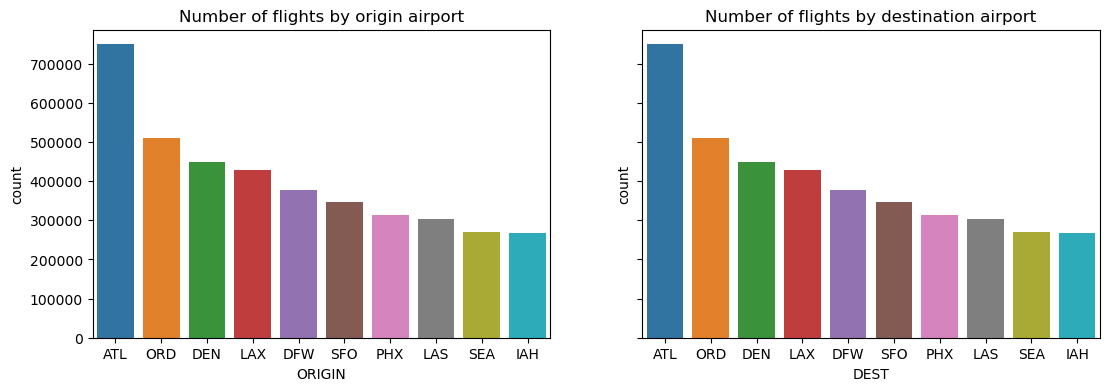

In [7]:
#Most frequent origin airports
n = 10
freq_orig = flights_na['ORIGIN'].value_counts()[:n]
freq_dest = flights_na['DEST'].value_counts()[:n]
print(f"Top {n} origin airports: \n{freq_orig}")
print(f"Top {n} destination airports: \n{freq_dest}")
fig,ax = plt.subplots(1,2, sharey='row', figsize=(13,4))
sns.countplot(x = 'ORIGIN', data = flights_na[flights_na['ORIGIN'].isin(freq_orig.keys().tolist())], order = freq_orig.index, ax = ax[0])
ax[0].set_title("Number of flights by origin airport")
sns.countplot(x = 'DEST', data = flights_na[flights_na['DEST'].isin(freq_dest.keys().tolist())], order = freq_dest.index, ax = ax[1])
ax[1].set_title("Number of flights by destination airport")

Atlanta is the airport with the highest incoming flights with 748848 flights arriving in the two years of 2016 and 2017. Logically nearly the same number of flights has to leave the airport which also makes Atlanta the airports with the most outgoing flights.

Because we only observe a single airport, we chose the airport with the highest traffic. This would be the airport of Atlanta.

In [8]:
atl_flights = flights_na[flights_na["DEST"] == 'ATL']
atl_flights = atl_flights.drop(["DEST"],axis=1)
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
140,2016-01-01,WN,N550WN,3211,AUS,610,609.0,-1.0,10.0,619.0,...,0.0,130.0,116.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
141,2016-01-01,WN,N739GB,3277,AUS,1905,1919.0,14.0,9.0,1928.0,...,0.0,120.0,109.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
279,2016-01-01,WN,N405WN,782,BWI,1910,1933.0,23.0,14.0,1947.0,...,0.0,125.0,115.0,92.0,577.0,NaN,NaN,NaN,NaN,NaN
280,2016-01-01,WN,N638SW,866,BWI,2020,2024.0,4.0,15.0,2039.0,...,0.0,120.0,127.0,102.0,577.0,NaN,NaN,NaN,NaN,NaN
281,2016-01-01,WN,N239WN,1856,BWI,1210,1231.0,21.0,9.0,1240.0,...,0.0,120.0,113.0,98.0,577.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,1237,1232.0,-5.0,12.0,1244.0,...,0.0,103.0,92.0,73.0,373.0,NaN,NaN,NaN,NaN,NaN
11292046,2017-12-31,DL,N775DE,2901,CVG,1110,1102.0,-8.0,10.0,1112.0,...,0.0,96.0,86.0,69.0,373.0,NaN,NaN,NaN,NaN,NaN
11292050,2017-12-31,DL,N950AT,2910,AVP,600,606.0,6.0,11.0,617.0,...,0.0,153.0,141.0,123.0,714.0,NaN,NaN,NaN,NaN,NaN
11292052,2017-12-31,DL,N391DA,2927,SMF,2325,2323.0,-2.0,13.0,2336.0,...,0.0,264.0,240.0,221.0,2092.0,NaN,NaN,NaN,NaN,NaN


Value count for different origins:
 MCO    18078
LGA    16602
FLL    15965
TPA    15001
ORD    14901
       ...  
FCA       25
RAP       25
MSO       18
SCE       11
GJT        1
Name: ORIGIN, Length: 166, dtype: int64


<AxesSubplot:title={'center':'Number of Flights by Origin Airports to Atlanta (Top 83 Airports of 166)'}, xlabel='ORIGIN', ylabel='count'>

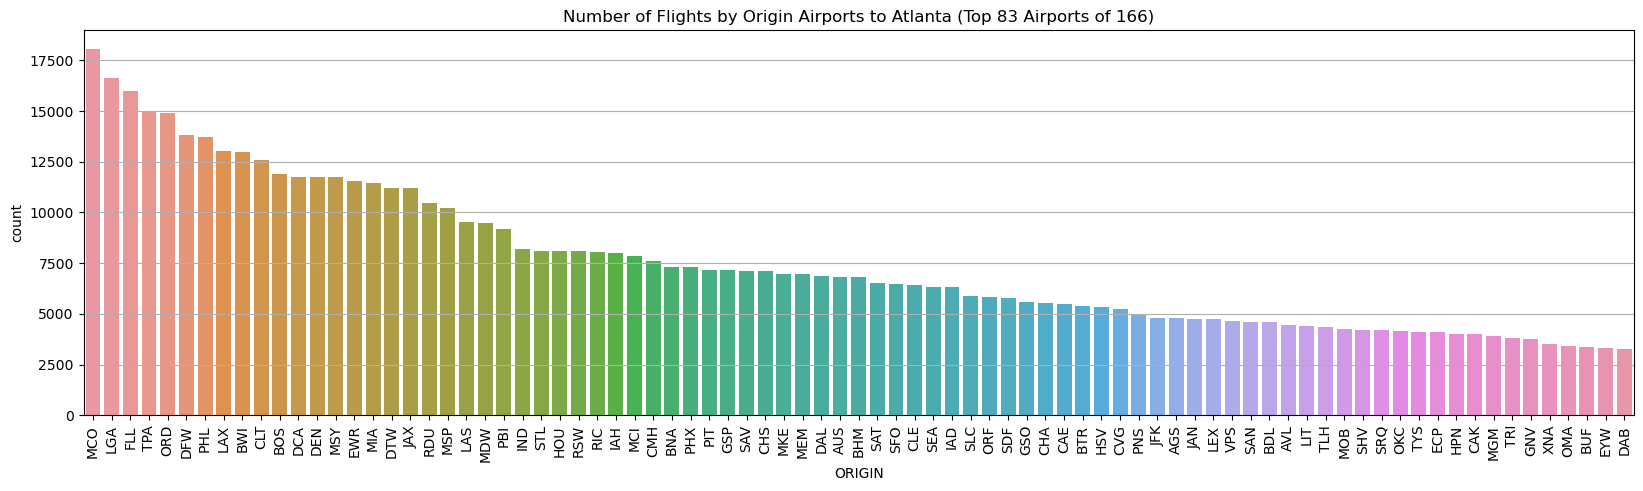

In [9]:
freq_orig = atl_flights['ORIGIN'].value_counts()
print(f"Value count for different origins:\n {freq_orig}")
n = int(len(freq_orig)/2)
fig, ax = plt.subplots(figsize = (20,5))
ax.set_title(f"Number of Flights by Origin Airports to Atlanta (Top {n} Airports of {len(freq_orig)})")
ax.tick_params(axis = 'x', which='major', labelsize=10, labelrotation = 90)
ax.grid(visible = True)
sns.countplot(data=atl_flights, x="ORIGIN", ax = ax, order=freq_orig[:n].index)

<AxesSubplot:title={'center':'Boxplots for Arrival Delay for Most 83 Occuring Airports (y-limit= [-80, 80])'}, xlabel='ORIGIN', ylabel='ARR_DELAY'>

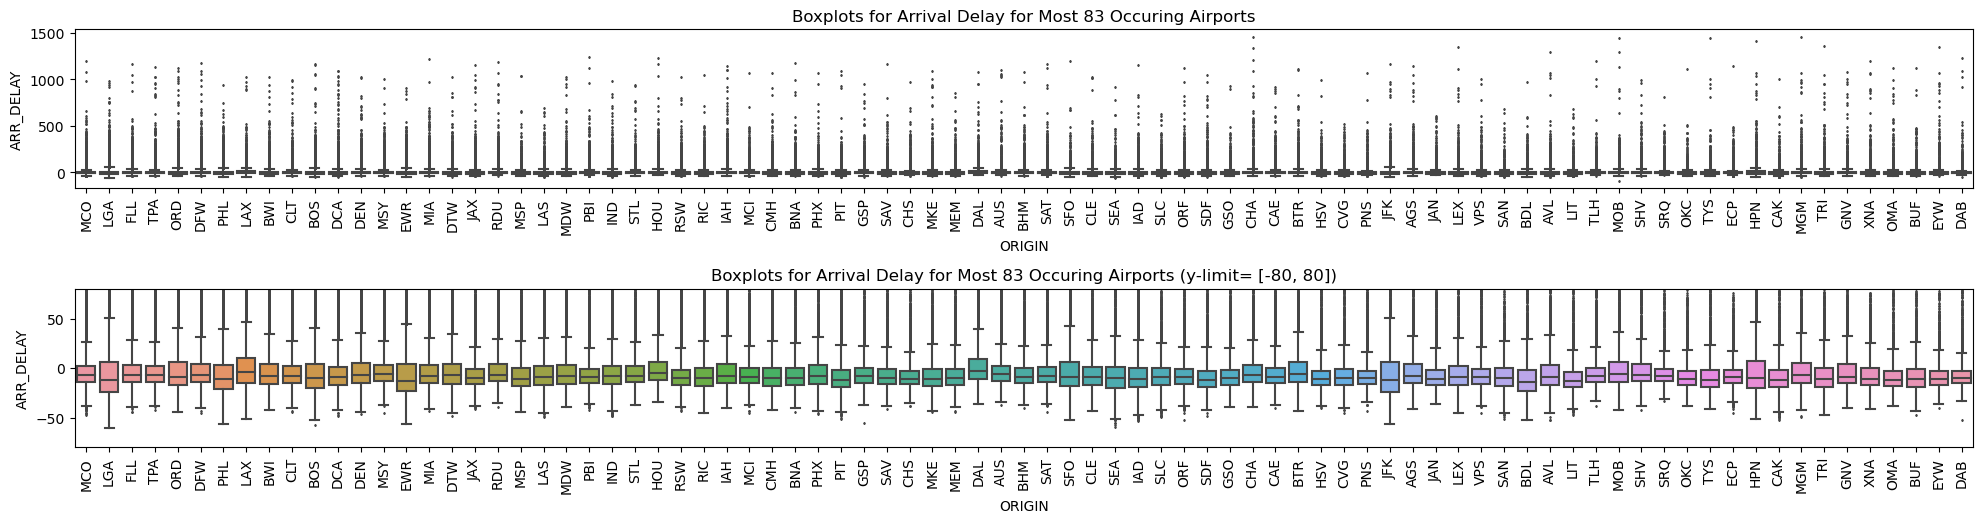

In [10]:
fig,ax = plt.subplots(2,1, figsize = (20,5))
ax[0].set_title(f"Boxplots for Arrival Delay for Most {n} Occuring Airports")
ax[0].tick_params(axis = 'x', which='major', labelsize=10, labelrotation = 90)
sns.boxplot(x="ORIGIN", y="ARR_DELAY", data=atl_flights, ax = ax[0] ,order=freq_orig[:n].index, fliersize = 1)
lim = [-80, 80]
ax[1].set_title(f"Boxplots for Arrival Delay for Most {n} Occuring Airports (y-limit= {lim})")
ax[1].tick_params(axis = 'x', which='major', labelsize=10, labelrotation = 90)
ax[1].set_ylim(bottom=lim[0], top=lim[1])
fig.tight_layout()
sns.boxplot(x="ORIGIN", y="ARR_DELAY", data=atl_flights, ax = ax[1] ,order=freq_orig[:n].index, fliersize = 1)

## Arrival Delay
Arrival Delay is a column which was delivered by the data source. Here we analyse the underlying data and clean it up

In [11]:
atl_flights[atl_flights["ARR_DELAY"].isna()]

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
32735,2016-01-03,OO,N953SW,4455,FWA,1620,NaN,NaN,NaN,NaN,...,0.0,114.0,NaN,NaN,508.0,NaN,NaN,NaN,NaN,NaN
33518,2016-01-03,OO,N613SK,4852,GRB,535,530.0,-5.0,NaN,NaN,...,0.0,149.0,NaN,NaN,774.0,NaN,NaN,NaN,NaN,NaN
39695,2016-01-03,EV,N857AS,5124,AVL,1420,NaN,NaN,NaN,NaN,...,0.0,62.0,NaN,NaN,164.0,NaN,NaN,NaN,NaN,NaN
47936,2016-01-04,DL,N954DL,1724,BDL,1830,1856.0,26.0,10.0,1906.0,...,1.0,170.0,NaN,NaN,859.0,NaN,NaN,NaN,NaN,NaN
50845,2016-01-04,EV,N166PQ,5012,CLE,740,733.0,-7.0,15.0,748.0,...,1.0,127.0,NaN,NaN,554.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11239049,2017-12-28,DL,N669DN,2046,PHX,1726,1809.0,43.0,20.0,1829.0,...,1.0,209.0,NaN,NaN,1587.0,NaN,NaN,NaN,NaN,NaN
11240059,2017-12-28,AA,N724AA,2079,PHL,1250,1248.0,-2.0,13.0,1301.0,...,1.0,138.0,NaN,NaN,666.0,NaN,NaN,NaN,NaN,NaN
11247368,2017-12-28,AA,N673AA,612,PHX,1315,1314.0,-1.0,14.0,1328.0,...,1.0,213.0,NaN,NaN,1587.0,NaN,NaN,NaN,NaN,NaN
11270593,2017-12-30,DL,N957AT,1943,DTW,1010,1108.0,58.0,12.0,1120.0,...,1.0,139.0,NaN,NaN,594.0,NaN,NaN,NaN,NaN,NaN


It seems that most flights where the arrival time is null is about a diverted or cancelled flight.
Let's get a bit deeper into this observation

In [12]:
idx_canceled = atl_flights[atl_flights['CANCELLED'] == 1].index
idx_diverted = atl_flights[atl_flights['DIVERTED'] == 1].index
nr_canceled = len(idx_canceled)
nr_diverted = len(idx_diverted)
print(f"Number of canceled flights: {nr_canceled}")
print(f"Number of diverted flights: {nr_diverted}")
print(f"Sum: {nr_canceled + nr_diverted}")
idx_drop = list(list(idx_canceled) + list(idx_diverted))
atl_flights = atl_flights.drop(idx_drop, axis = 0)
atl_flights[atl_flights["ARR_DELAY"].isna()]

Number of canceled flights: 7851
Number of diverted flights: 1568
Sum: 9419


,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


Through dropping all diverted and canceled flights, we now only have non null Arrival Delays

In [13]:
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
140,2016-01-01,WN,N550WN,3211,AUS,610,609.0,-1.0,10.0,619.0,...,0.0,130.0,116.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
141,2016-01-01,WN,N739GB,3277,AUS,1905,1919.0,14.0,9.0,1928.0,...,0.0,120.0,109.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
279,2016-01-01,WN,N405WN,782,BWI,1910,1933.0,23.0,14.0,1947.0,...,0.0,125.0,115.0,92.0,577.0,NaN,NaN,NaN,NaN,NaN
280,2016-01-01,WN,N638SW,866,BWI,2020,2024.0,4.0,15.0,2039.0,...,0.0,120.0,127.0,102.0,577.0,NaN,NaN,NaN,NaN,NaN
281,2016-01-01,WN,N239WN,1856,BWI,1210,1231.0,21.0,9.0,1240.0,...,0.0,120.0,113.0,98.0,577.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,1237,1232.0,-5.0,12.0,1244.0,...,0.0,103.0,92.0,73.0,373.0,NaN,NaN,NaN,NaN,NaN
11292046,2017-12-31,DL,N775DE,2901,CVG,1110,1102.0,-8.0,10.0,1112.0,...,0.0,96.0,86.0,69.0,373.0,NaN,NaN,NaN,NaN,NaN
11292050,2017-12-31,DL,N950AT,2910,AVP,600,606.0,6.0,11.0,617.0,...,0.0,153.0,141.0,123.0,714.0,NaN,NaN,NaN,NaN,NaN
11292052,2017-12-31,DL,N391DA,2927,SMF,2325,2323.0,-2.0,13.0,2336.0,...,0.0,264.0,240.0,221.0,2092.0,NaN,NaN,NaN,NaN,NaN


## UNIQUE CARRIER

Stats of Unique Carriers:
count     739429
unique        10
top           DL
freq      484553
Name: OP_UNIQUE_CARRIER, dtype: object
Null Values in Unique Carriers: 0


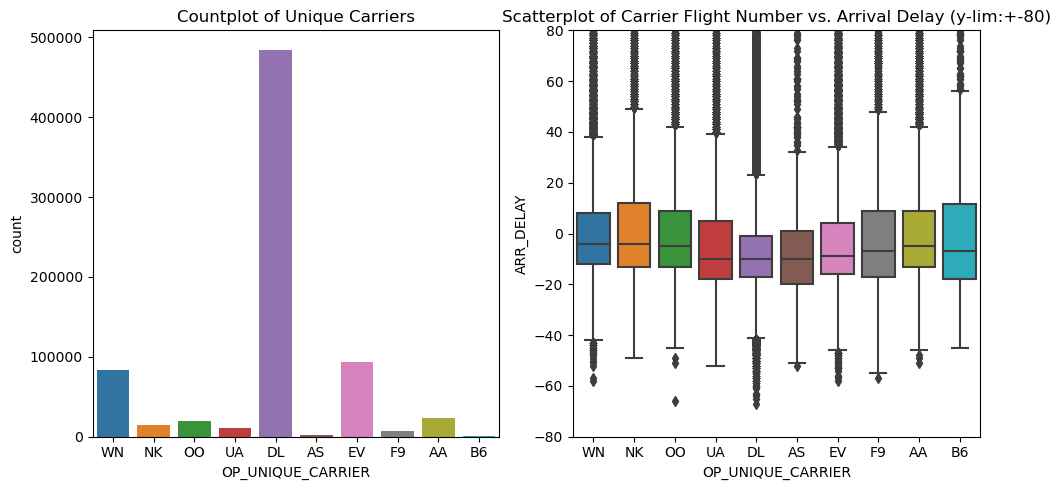

In [14]:
print(f"Stats of Unique Carriers:\n{atl_flights['OP_UNIQUE_CARRIER'].describe()}")
print(f"Null Values in Unique Carriers: {np.sum(atl_flights['OP_UNIQUE_CARRIER'].isna())}")
freq_carrs =  atl_flights['OP_UNIQUE_CARRIER']
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_title("Countplot of Unique Carriers")
sns.countplot(atl_flights, x = "OP_UNIQUE_CARRIER", ax = ax[0])
n = 80
ax[1].set_title(f"Scatterplot of Carrier Flight Number vs. Arrival Delay (y-lim:+-{n})")
ax[1].set_ylim(bottom=n*-1, top=n)
sns.boxplot(atl_flights, x = "OP_UNIQUE_CARRIER", y = "ARR_DELAY")

fig.tight_layout()

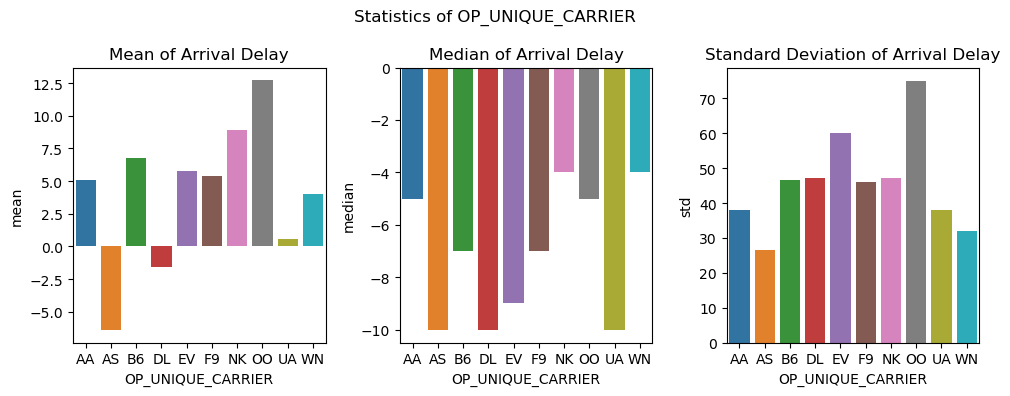

In [15]:
carrier_stat_df = atl_flights[["OP_UNIQUE_CARRIER","ARR_DELAY"]].groupby("OP_UNIQUE_CARRIER").agg(['mean','median','std'])
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle("Statistics of OP_UNIQUE_CARRIER")
ax[0].set_title("Mean of Arrival Delay")
sns.barplot(carrier_stat_df, x=carrier_stat_df.index, y=carrier_stat_df["ARR_DELAY"]["mean"], ax=ax[0])
ax[1].set_title("Median of Arrival Delay")
sns.barplot(carrier_stat_df, x=carrier_stat_df.index, y=carrier_stat_df["ARR_DELAY"]["median"], ax=ax[1])
ax[2].set_title("Standard Deviation of Arrival Delay")
sns.barplot(carrier_stat_df, x=carrier_stat_df.index, y=carrier_stat_df["ARR_DELAY"]["std"], ax=ax[2])
fig.tight_layout()

The Unique Carrier column does show some differences. We could use the median value to train a model. However, that would require us to always change this based on the years before. Although, we will let this column pass for now.



## Column-Types and Null-Values

In [16]:
atl_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739429 entries, 140 to 11292064
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              739429 non-null  object 
 1   OP_UNIQUE_CARRIER    739429 non-null  object 
 2   TAIL_NUM             739429 non-null  object 
 3   OP_CARRIER_FL_NUM    739429 non-null  int64  
 4   ORIGIN               739429 non-null  object 
 5   CRS_DEP_TIME         739429 non-null  int64  
 6   DEP_TIME             739429 non-null  float64
 7   DEP_DELAY            739429 non-null  float64
 8   TAXI_OUT             739429 non-null  float64
 9   WHEELS_OFF           739429 non-null  float64
 10  WHEELS_ON            739429 non-null  float64
 11  TAXI_IN              739429 non-null  float64
 12  CRS_ARR_TIME         739429 non-null  int64  
 13  ARR_TIME             739429 non-null  float64
 14  ARR_DELAY            739429 non-null  float64
 15  CANCELLED    

## Data Ranges

In [17]:
for col in atl_flights:
    print(col)
    mask = atl_flights[col].notna()
    if atl_flights[col].dtype == object:
        print("[\""+str(atl_flights[col][mask].min()) + "\" ; \"" + str(atl_flights[col][mask].max())+"\"]")
    else:
        print("["+str(atl_flights[col][mask].min()) + " ; " + str(atl_flights[col][mask].max())+"]")


FL_DATE
["2016-01-01" ; "2017-12-31"]
OP_UNIQUE_CARRIER
["AA" ; "WN"]
TAIL_NUM
["7819A" ; "N999DN"]
OP_CARRIER_FL_NUM
[1 ; 6962]
ORIGIN
["ABE" ; "XNA"]
CRS_DEP_TIME
[1 ; 2359]
DEP_TIME
[1.0 ; 2400.0]
DEP_DELAY
[-188.0 ; 1816.0]
TAXI_OUT
[1.0 ; 172.0]
WHEELS_OFF
[1.0 ; 2400.0]
WHEELS_ON
[1.0 ; 2400.0]
TAXI_IN
[1.0 ; 414.0]
CRS_ARR_TIME
[1 ; 2359]
ARR_TIME
[1.0 ; 2400.0]
ARR_DELAY
[-202.0 ; 1810.0]
CANCELLED
[0.0 ; 0.0]
CANCELLATION_CODE
["nan" ; "nan"]
DIVERTED
[0.0 ; 0.0]
CRS_ELAPSED_TIME
[41.0 ; 535.0]
ACTUAL_ELAPSED_TIME
[27.0 ; 670.0]
AIR_TIME
[12.0 ; 519.0]
DISTANCE
[83.0 ; 4502.0]
CARRIER_DELAY
[0.0 ; 1810.0]
WEATHER_DELAY
[0.0 ; 1176.0]
NAS_DELAY
[0.0 ; 1167.0]
SECURITY_DELAY
[0.0 ; 245.0]
LATE_AIRCRAFT_DELAY
[0.0 ; 1336.0]


## CANCELLATION_CODE

In [18]:
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
140,2016-01-01,WN,N550WN,3211,AUS,610,609.0,-1.0,10.0,619.0,...,0.0,130.0,116.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
141,2016-01-01,WN,N739GB,3277,AUS,1905,1919.0,14.0,9.0,1928.0,...,0.0,120.0,109.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
279,2016-01-01,WN,N405WN,782,BWI,1910,1933.0,23.0,14.0,1947.0,...,0.0,125.0,115.0,92.0,577.0,NaN,NaN,NaN,NaN,NaN
280,2016-01-01,WN,N638SW,866,BWI,2020,2024.0,4.0,15.0,2039.0,...,0.0,120.0,127.0,102.0,577.0,NaN,NaN,NaN,NaN,NaN
281,2016-01-01,WN,N239WN,1856,BWI,1210,1231.0,21.0,9.0,1240.0,...,0.0,120.0,113.0,98.0,577.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,1237,1232.0,-5.0,12.0,1244.0,...,0.0,103.0,92.0,73.0,373.0,NaN,NaN,NaN,NaN,NaN
11292046,2017-12-31,DL,N775DE,2901,CVG,1110,1102.0,-8.0,10.0,1112.0,...,0.0,96.0,86.0,69.0,373.0,NaN,NaN,NaN,NaN,NaN
11292050,2017-12-31,DL,N950AT,2910,AVP,600,606.0,6.0,11.0,617.0,...,0.0,153.0,141.0,123.0,714.0,NaN,NaN,NaN,NaN,NaN
11292052,2017-12-31,DL,N391DA,2927,SMF,2325,2323.0,-2.0,13.0,2336.0,...,0.0,264.0,240.0,221.0,2092.0,NaN,NaN,NaN,NaN,NaN


In [19]:
atl_copy = atl_flights.copy()
atl_copy["CANCELLATION_CODE"] = atl_copy["CANCELLATION_CODE"].fillna('N')
atl_copy["CANCELLATION_CODE"].value_counts()

N    739429
Name: CANCELLATION_CODE, dtype: int64

<AxesSubplot:xlabel='CANCELLATION_CODE', ylabel='ARR_DELAY'>

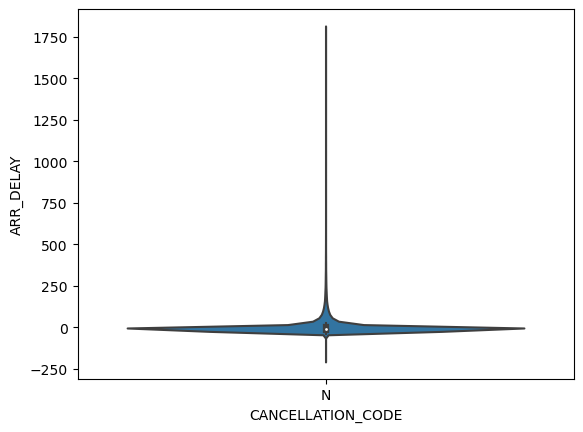

In [20]:
sns.violinplot(data=atl_copy, x="CANCELLATION_CODE", y="ARR_DELAY")

Cancellation Code is always N due to previous operations. Thats why we drop it

In [21]:
atl_flights[~atl_flights["CANCELLATION_CODE"].isna()]

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


In [22]:
print(f"Shape of original: {atl_flights.shape}")
print(f"Shape of rows with not null cancelation code: {atl_flights[~atl_flights['CANCELLATION_CODE'].isna()].shape}")
print(f"Supposed shape of data without cancellation code: ({atl_flights.shape[0]-atl_flights[~atl_flights['CANCELLATION_CODE'].isna()].shape[0]},{atl_flights.shape[1]}) ")
print(f"Actual shape of data without cancellation code: {atl_flights.drop(atl_flights[~atl_flights['CANCELLATION_CODE'].isna()].index, axis='index').shape}")

Shape of original: (739429, 27)
Shape of rows with not null cancelation code: (0, 27)
Supposed shape of data without cancellation code: (739429,27) 
Actual shape of data without cancellation code: (739429, 27)


In [23]:
# Dropping rows and column
atl_flights = atl_flights.drop(atl_flights[~atl_flights["CANCELLATION_CODE"].isna()].index, axis="index")
if "CANCELLATION_CODE" in atl_flights.columns:
    atl_flights = atl_flights.drop("CANCELLATION_CODE", axis = "columns")
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
140,2016-01-01,WN,N550WN,3211,AUS,610,609.0,-1.0,10.0,619.0,...,0.0,130.0,116.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
141,2016-01-01,WN,N739GB,3277,AUS,1905,1919.0,14.0,9.0,1928.0,...,0.0,120.0,109.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
279,2016-01-01,WN,N405WN,782,BWI,1910,1933.0,23.0,14.0,1947.0,...,0.0,125.0,115.0,92.0,577.0,NaN,NaN,NaN,NaN,NaN
280,2016-01-01,WN,N638SW,866,BWI,2020,2024.0,4.0,15.0,2039.0,...,0.0,120.0,127.0,102.0,577.0,NaN,NaN,NaN,NaN,NaN
281,2016-01-01,WN,N239WN,1856,BWI,1210,1231.0,21.0,9.0,1240.0,...,0.0,120.0,113.0,98.0,577.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,1237,1232.0,-5.0,12.0,1244.0,...,0.0,103.0,92.0,73.0,373.0,NaN,NaN,NaN,NaN,NaN
11292046,2017-12-31,DL,N775DE,2901,CVG,1110,1102.0,-8.0,10.0,1112.0,...,0.0,96.0,86.0,69.0,373.0,NaN,NaN,NaN,NaN,NaN
11292050,2017-12-31,DL,N950AT,2910,AVP,600,606.0,6.0,11.0,617.0,...,0.0,153.0,141.0,123.0,714.0,NaN,NaN,NaN,NaN,NaN
11292052,2017-12-31,DL,N391DA,2927,SMF,2325,2323.0,-2.0,13.0,2336.0,...,0.0,264.0,240.0,221.0,2092.0,NaN,NaN,NaN,NaN,NaN


In [24]:
atl_flights["TAIL_NUM"].info()

<class 'pandas.core.series.Series'>
Int64Index: 739429 entries, 140 to 11292064
Series name: TAIL_NUM
Non-Null Count   Dtype 
--------------   ----- 
739429 non-null  object
dtypes: object(1)
memory usage: 11.3+ MB


## Convertig strings to datetimes

In [25]:
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
140,2016-01-01,WN,N550WN,3211,AUS,610,609.0,-1.0,10.0,619.0,...,0.0,130.0,116.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
141,2016-01-01,WN,N739GB,3277,AUS,1905,1919.0,14.0,9.0,1928.0,...,0.0,120.0,109.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN
279,2016-01-01,WN,N405WN,782,BWI,1910,1933.0,23.0,14.0,1947.0,...,0.0,125.0,115.0,92.0,577.0,NaN,NaN,NaN,NaN,NaN
280,2016-01-01,WN,N638SW,866,BWI,2020,2024.0,4.0,15.0,2039.0,...,0.0,120.0,127.0,102.0,577.0,NaN,NaN,NaN,NaN,NaN
281,2016-01-01,WN,N239WN,1856,BWI,1210,1231.0,21.0,9.0,1240.0,...,0.0,120.0,113.0,98.0,577.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,1237,1232.0,-5.0,12.0,1244.0,...,0.0,103.0,92.0,73.0,373.0,NaN,NaN,NaN,NaN,NaN
11292046,2017-12-31,DL,N775DE,2901,CVG,1110,1102.0,-8.0,10.0,1112.0,...,0.0,96.0,86.0,69.0,373.0,NaN,NaN,NaN,NaN,NaN
11292050,2017-12-31,DL,N950AT,2910,AVP,600,606.0,6.0,11.0,617.0,...,0.0,153.0,141.0,123.0,714.0,NaN,NaN,NaN,NaN,NaN
11292052,2017-12-31,DL,N391DA,2927,SMF,2325,2323.0,-2.0,13.0,2336.0,...,0.0,264.0,240.0,221.0,2092.0,NaN,NaN,NaN,NaN,NaN


### Create CRS_Times

In [26]:
def int_to_timestring(n: int):
    n = str(n)
    for x in range(4-len(n)):
        n="0"+n
    n = n[:2] + ":" + n[2:]
    if n == "24:00":
        n = "00:00"
    return n

atl_flights["CRS_DEP_TIME"] = atl_flights["CRS_DEP_TIME"].apply(lambda x: int_to_timestring(x))
atl_flights["CRS_ARR_TIME"] = atl_flights["CRS_ARR_TIME"].apply(lambda x: int_to_timestring(x))
atl_flights["CRS_DEP_DATE"] = atl_flights["FL_DATE"] + " " + atl_flights["CRS_DEP_TIME"]
atl_flights["CRS_DEP_DATE"] = pd.to_datetime(atl_flights["CRS_DEP_DATE"], format="%Y-%m-%d %H:%M")
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE
140,2016-01-01,WN,N550WN,3211,AUS,06:10,609.0,-1.0,10.0,619.0,...,130.0,116.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 06:10:00
141,2016-01-01,WN,N739GB,3277,AUS,19:05,1919.0,14.0,9.0,1928.0,...,120.0,109.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:05:00
279,2016-01-01,WN,N405WN,782,BWI,19:10,1933.0,23.0,14.0,1947.0,...,125.0,115.0,92.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:10:00
280,2016-01-01,WN,N638SW,866,BWI,20:20,2024.0,4.0,15.0,2039.0,...,120.0,127.0,102.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 20:20:00
281,2016-01-01,WN,N239WN,1856,BWI,12:10,1231.0,21.0,9.0,1240.0,...,120.0,113.0,98.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 12:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,12:37,1232.0,-5.0,12.0,1244.0,...,103.0,92.0,73.0,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 12:37:00
11292046,2017-12-31,DL,N775DE,2901,CVG,11:10,1102.0,-8.0,10.0,1112.0,...,96.0,86.0,69.0,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 11:10:00
11292050,2017-12-31,DL,N950AT,2910,AVP,06:00,606.0,6.0,11.0,617.0,...,153.0,141.0,123.0,714.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 06:00:00
11292052,2017-12-31,DL,N391DA,2927,SMF,23:25,2323.0,-2.0,13.0,2336.0,...,264.0,240.0,221.0,2092.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:25:00


In [27]:
atl_flights["CRS_ARR_DATE"] = atl_flights.apply(lambda row: row.CRS_DEP_DATE + pd.Timedelta(minutes=row.CRS_ELAPSED_TIME), axis= 1)
atl_flights["CRS_ARR_DATE_OLD"] = atl_flights["FL_DATE"] + " " + atl_flights["CRS_ARR_TIME"]
atl_flights["CRS_ARR_DATE_OLD"] = pd.to_datetime(atl_flights["CRS_ARR_DATE_OLD"], format="%Y-%m-%d %H:%M")
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD
140,2016-01-01,WN,N550WN,3211,AUS,06:10,609.0,-1.0,10.0,619.0,...,94.0,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 06:10:00,2016-01-01 08:20:00,2016-01-01 09:20:00
141,2016-01-01,WN,N739GB,3277,AUS,19:05,1919.0,14.0,9.0,1928.0,...,94.0,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:05:00,2016-01-01 21:05:00,2016-01-01 22:05:00
279,2016-01-01,WN,N405WN,782,BWI,19:10,1933.0,23.0,14.0,1947.0,...,92.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 21:15:00
280,2016-01-01,WN,N638SW,866,BWI,20:20,2024.0,4.0,15.0,2039.0,...,102.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 22:20:00
281,2016-01-01,WN,N239WN,1856,BWI,12:10,1231.0,21.0,9.0,1240.0,...,98.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 14:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,12:37,1232.0,-5.0,12.0,1244.0,...,73.0,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 14:20:00
11292046,2017-12-31,DL,N775DE,2901,CVG,11:10,1102.0,-8.0,10.0,1112.0,...,69.0,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 12:46:00
11292050,2017-12-31,DL,N950AT,2910,AVP,06:00,606.0,6.0,11.0,617.0,...,123.0,714.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 08:33:00
11292052,2017-12-31,DL,N391DA,2927,SMF,23:25,2323.0,-2.0,13.0,2336.0,...,221.0,2092.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:25:00,2018-01-01 03:49:00,2017-12-31 06:49:00


In [28]:
atl_flights[atl_flights["CRS_DEP_DATE"] >= atl_flights["CRS_ARR_DATE"]]

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD


In [29]:
atl_flights[atl_flights["CRS_DEP_DATE"] >= atl_flights["CRS_ARR_DATE_OLD"]]

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD
649,2016-01-01,WN,N383SW,1132,DEN,19:30,1952.0,22.0,14.0,2006.0,...,138.0,1199.0,5.0,0.0,0.0,0.0,10.0,2016-01-01 19:30:00,2016-01-01 22:15:00,2016-01-01 00:15:00
651,2016-01-01,WN,N641SW,3029,DEN,20:20,2052.0,32.0,10.0,2102.0,...,135.0,1199.0,7.0,0.0,0.0,0.0,15.0,2016-01-01 20:20:00,2016-01-01 23:00:00,2016-01-01 01:00:00
3268,2016-01-01,NK,N506NK,806,LAS,23:30,2328.0,-2.0,13.0,2341.0,...,186.0,1747.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 23:30:00,2016-01-02 03:20:00,2016-01-01 06:20:00
4967,2016-01-01,UA,N76523,1889,EWR,21:26,2139.0,13.0,13.0,2152.0,...,118.0,746.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 21:26:00,2016-01-02 00:01:00,2016-01-01 00:01:00
5427,2016-01-01,UA,N77518,342,SFO,23:30,2353.0,23.0,17.0,10.0,...,232.0,2139.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 23:30:00,2016-01-02 04:09:00,2016-01-01 07:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11290999,2017-12-31,DL,N804DN,1354,LAX,23:59,2358.0,-1.0,31.0,29.0,...,211.0,1947.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:59:00,2018-01-01 04:05:00,2017-12-31 07:05:00
11291209,2017-12-31,DL,N6700,1588,SEA,22:15,2215.0,0.0,13.0,2228.0,...,231.0,2182.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 22:15:00,2018-01-01 02:54:00,2017-12-31 05:54:00
11291377,2017-12-31,DL,N828DN,1798,LAS,23:59,2348.0,-11.0,11.0,2359.0,...,190.0,1747.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:59:00,2018-01-01 03:39:00,2017-12-31 06:39:00
11291617,2017-12-31,DL,N347NW,2123,BZN,23:30,2324.0,-6.0,13.0,2337.0,...,170.0,1640.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:30:00,2018-01-01 03:24:00,2017-12-31 05:24:00


We see that the CRS_ARR_DATE_OLD has issues moving one day up. We try to minimize that by simply adding one day to all of these.

### Timezone shift

In [30]:
def calc_day_shift(row):
    if row.CRS_DEP_DATE >= row.CRS_ARR_DATE_OLD:
        return row.CRS_ARR_DATE_OLD + pd.Timedelta(days=1)
    else:
        return row.CRS_ARR_DATE_OLD
atl_flights["CRS_ARR_DATE_OLD"] = atl_flights.apply(calc_day_shift , axis=1)

In [31]:
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD
140,2016-01-01,WN,N550WN,3211,AUS,06:10,609.0,-1.0,10.0,619.0,...,94.0,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 06:10:00,2016-01-01 08:20:00,2016-01-01 09:20:00
141,2016-01-01,WN,N739GB,3277,AUS,19:05,1919.0,14.0,9.0,1928.0,...,94.0,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:05:00,2016-01-01 21:05:00,2016-01-01 22:05:00
279,2016-01-01,WN,N405WN,782,BWI,19:10,1933.0,23.0,14.0,1947.0,...,92.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 21:15:00
280,2016-01-01,WN,N638SW,866,BWI,20:20,2024.0,4.0,15.0,2039.0,...,102.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 22:20:00
281,2016-01-01,WN,N239WN,1856,BWI,12:10,1231.0,21.0,9.0,1240.0,...,98.0,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 14:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,12:37,1232.0,-5.0,12.0,1244.0,...,73.0,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 14:20:00
11292046,2017-12-31,DL,N775DE,2901,CVG,11:10,1102.0,-8.0,10.0,1112.0,...,69.0,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 12:46:00
11292050,2017-12-31,DL,N950AT,2910,AVP,06:00,606.0,6.0,11.0,617.0,...,123.0,714.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 08:33:00
11292052,2017-12-31,DL,N391DA,2927,SMF,23:25,2323.0,-2.0,13.0,2336.0,...,221.0,2092.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:25:00,2018-01-01 03:49:00,2018-01-01 06:49:00


In [32]:
atl_flights[atl_flights["CRS_DEP_DATE"] >= atl_flights["CRS_ARR_DATE_OLD"]]

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD


We eradicated the false arrival dates and can now focus on timezones and checking if mistakes still lurk in the data

In [33]:
def calc_timezone(row):
    diff = row.CRS_ARR_DATE - row.CRS_ARR_DATE_OLD
    diff_in_s = diff.total_seconds()
    hours = divmod(diff_in_s, 3600)[0]
    return hours

atl_flights["TIMEZONE_DELTA"] = atl_flights.apply(calc_timezone, axis=1)
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD,TIMEZONE_DELTA
140,2016-01-01,WN,N550WN,3211,AUS,06:10,609.0,-1.0,10.0,619.0,...,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 06:10:00,2016-01-01 08:20:00,2016-01-01 09:20:00,-1.0
141,2016-01-01,WN,N739GB,3277,AUS,19:05,1919.0,14.0,9.0,1928.0,...,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:05:00,2016-01-01 21:05:00,2016-01-01 22:05:00,-1.0
279,2016-01-01,WN,N405WN,782,BWI,19:10,1933.0,23.0,14.0,1947.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 21:15:00,0.0
280,2016-01-01,WN,N638SW,866,BWI,20:20,2024.0,4.0,15.0,2039.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 22:20:00,0.0
281,2016-01-01,WN,N239WN,1856,BWI,12:10,1231.0,21.0,9.0,1240.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 14:10:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,12:37,1232.0,-5.0,12.0,1244.0,...,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 14:20:00,0.0
11292046,2017-12-31,DL,N775DE,2901,CVG,11:10,1102.0,-8.0,10.0,1112.0,...,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 12:46:00,0.0
11292050,2017-12-31,DL,N950AT,2910,AVP,06:00,606.0,6.0,11.0,617.0,...,714.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 08:33:00,0.0
11292052,2017-12-31,DL,N391DA,2927,SMF,23:25,2323.0,-2.0,13.0,2336.0,...,2092.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:25:00,2018-01-01 03:49:00,2018-01-01 06:49:00,-3.0


In [34]:
airport_timezones = atl_flights[["TIMEZONE_DELTA","ORIGIN"]].value_counts()
airport_timezones

TIMEZONE_DELTA  ORIGIN
 0.0            MCO       17805
                LGA       16289
                FLL       15695
                TPA       14811
-1.0            ORD       14711
                          ...  
-4.0            SEA           2
                SJC           1
                SAN           1
-2.0            GJT           1
-1.0            DEN           1
Length: 187, dtype: int64

In [35]:
airport_timezones.reset_index().sort_values(by="TIMEZONE_DELTA")

,TIMEZONE_DELTA,ORIGIN,0
149,-6.0,HNL,476
153,-5.0,HNL,252
171,-4.0,LAS,6
154,-4.0,ANC,221
173,-4.0,LAX,5
...,...,...,...
108,0.0,CHO,2052
77,0.0,GNV,3709
135,1.0,SJU,996
150,1.0,STT,472


In [36]:
atl_flights[atl_flights["ORIGIN"] == "HNL"]

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD,TIMEZONE_DELTA
12017,2016-01-01,DL,N807NW,836,HNL,17:35,1738.0,3.0,19.0,1757.0,...,4502.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 17:35:00,2016-01-02 02:09:00,2016-01-02 07:09:00,-5.0
16820,2016-01-02,DL,N807NW,836,HNL,17:35,1734.0,-1.0,21.0,1755.0,...,4502.0,NaN,NaN,NaN,NaN,NaN,2016-01-02 17:35:00,2016-01-03 02:12:00,2016-01-03 07:12:00,-5.0
35839,2016-01-03,DL,N807NW,836,HNL,17:35,1727.0,-8.0,24.0,1751.0,...,4502.0,NaN,NaN,NaN,NaN,NaN,2016-01-03 17:35:00,2016-01-04 02:12:00,2016-01-04 07:12:00,-5.0
48669,2016-01-04,DL,N807NW,836,HNL,17:35,1755.0,20.0,16.0,1811.0,...,4502.0,NaN,NaN,NaN,NaN,NaN,2016-01-04 17:35:00,2016-01-05 02:12:00,2016-01-05 07:12:00,-5.0
68047,2016-01-05,DL,N807NW,836,HNL,17:35,1754.0,19.0,17.0,1811.0,...,4502.0,NaN,NaN,NaN,NaN,NaN,2016-01-05 17:35:00,2016-01-06 02:13:00,2016-01-06 07:13:00,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227399,2017-12-27,DL,N825NW,836,HNL,17:55,1751.0,-4.0,22.0,1813.0,...,4502.0,NaN,NaN,NaN,NaN,NaN,2017-12-27 17:55:00,2017-12-28 02:35:00,2017-12-28 07:35:00,-5.0
11237723,2017-12-28,DL,N828NW,836,HNL,17:55,1805.0,10.0,17.0,1822.0,...,4502.0,6.0,0.0,12.0,0.0,4.0,2017-12-28 17:55:00,2017-12-29 02:35:00,2017-12-29 07:35:00,-5.0
11258144,2017-12-29,DL,N823NW,836,HNL,17:55,1754.0,-1.0,15.0,1809.0,...,4502.0,NaN,NaN,NaN,NaN,NaN,2017-12-29 17:55:00,2017-12-30 02:35:00,2017-12-30 07:35:00,-5.0
11269424,2017-12-30,DL,N829NW,836,HNL,17:55,1755.0,0.0,17.0,1812.0,...,4502.0,NaN,NaN,NaN,NaN,NaN,2017-12-30 17:55:00,2017-12-31 02:35:00,2017-12-31 07:35:00,-5.0


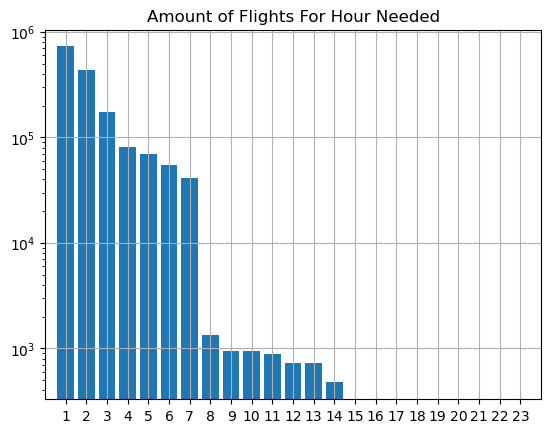

In [37]:
y = []
x = range(1,25)
for val in x:
    y.append(len(atl_flights[(atl_flights["CRS_ELAPSED_TIME"] + atl_flights["TIMEZONE_DELTA"] * -60) > val*60]))
fig, ax = plt.subplots()
ax.bar(x=x, height=y)
ax.set_title("Amount of Flights For Hour Needed")
ax.set_xlim(left=0,right=24)
ax.xaxis.set_ticks(np.arange(1,24,1))
plt.grid(True)
plt.yscale('log')
plt.show()

In [38]:
atl_flights[(atl_flights["CRS_ELAPSED_TIME"] + atl_flights["TIMEZONE_DELTA"] * -60) > 15*60]

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD,TIMEZONE_DELTA


### Calc Act Dates

In [39]:
atl_flights["ARR_DELAY"].isna().sum()

0

In [40]:
atl_flights["DEP_DELAY"].isna().sum()

0

In [41]:
atl_flights["FL_DATE"].isna().sum()

0

In [42]:
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD,TIMEZONE_DELTA
140,2016-01-01,WN,N550WN,3211,AUS,06:10,609.0,-1.0,10.0,619.0,...,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 06:10:00,2016-01-01 08:20:00,2016-01-01 09:20:00,-1.0
141,2016-01-01,WN,N739GB,3277,AUS,19:05,1919.0,14.0,9.0,1928.0,...,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:05:00,2016-01-01 21:05:00,2016-01-01 22:05:00,-1.0
279,2016-01-01,WN,N405WN,782,BWI,19:10,1933.0,23.0,14.0,1947.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 21:15:00,0.0
280,2016-01-01,WN,N638SW,866,BWI,20:20,2024.0,4.0,15.0,2039.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 22:20:00,0.0
281,2016-01-01,WN,N239WN,1856,BWI,12:10,1231.0,21.0,9.0,1240.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 14:10:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,12:37,1232.0,-5.0,12.0,1244.0,...,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 14:20:00,0.0
11292046,2017-12-31,DL,N775DE,2901,CVG,11:10,1102.0,-8.0,10.0,1112.0,...,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 12:46:00,0.0
11292050,2017-12-31,DL,N950AT,2910,AVP,06:00,606.0,6.0,11.0,617.0,...,714.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 08:33:00,0.0
11292052,2017-12-31,DL,N391DA,2927,SMF,23:25,2323.0,-2.0,13.0,2336.0,...,2092.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:25:00,2018-01-01 03:49:00,2018-01-01 06:49:00,-3.0


In [43]:
#atl_flights["CRS_ARR_DATE"] = atl_flights.apply(lambda row: row.CRS_DEP_DATE + pd.Timedelta(minutes=row.CRS_ELAPSED_TIME), axis= 1)
#atl_flights["CRS_ARR_DATE_OLD"] = atl_flights["FL_DATE"] + " " + atl_flights["CRS_ARR_TIME"]
#atl_flights["CRS_ARR_DATE_OLD"] = pd.to_datetime(atl_flights["CRS_ARR_DATE_OLD"], format="%Y-%m-%d %H:%M")
atl_flights["ACT_DEP_DATE"] = atl_flights.apply(lambda row: row.CRS_DEP_DATE + pd.Timedelta(minutes=row.DEP_DELAY), axis= 1)
atl_flights["ACT_ARR_DATE"] = atl_flights.apply(lambda row: row.CRS_ARR_DATE_OLD + pd.Timedelta(minutes=row.ARR_DELAY), axis= 1)
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD,TIMEZONE_DELTA,ACT_DEP_DATE,ACT_ARR_DATE
140,2016-01-01,WN,N550WN,3211,AUS,06:10,609.0,-1.0,10.0,619.0,...,NaN,NaN,NaN,NaN,2016-01-01 06:10:00,2016-01-01 08:20:00,2016-01-01 09:20:00,-1.0,2016-01-01 06:09:00,2016-01-01 09:05:00
141,2016-01-01,WN,N739GB,3277,AUS,19:05,1919.0,14.0,9.0,1928.0,...,NaN,NaN,NaN,NaN,2016-01-01 19:05:00,2016-01-01 21:05:00,2016-01-01 22:05:00,-1.0,2016-01-01 19:19:00,2016-01-01 22:08:00
279,2016-01-01,WN,N405WN,782,BWI,19:10,1933.0,23.0,14.0,1947.0,...,NaN,NaN,NaN,NaN,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 21:15:00,0.0,2016-01-01 19:33:00,2016-01-01 21:28:00
280,2016-01-01,WN,N638SW,866,BWI,20:20,2024.0,4.0,15.0,2039.0,...,NaN,NaN,NaN,NaN,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 22:20:00,0.0,2016-01-01 20:24:00,2016-01-01 22:31:00
281,2016-01-01,WN,N239WN,1856,BWI,12:10,1231.0,21.0,9.0,1240.0,...,NaN,NaN,NaN,NaN,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 14:10:00,0.0,2016-01-01 12:31:00,2016-01-01 14:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,12:37,1232.0,-5.0,12.0,1244.0,...,NaN,NaN,NaN,NaN,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 14:20:00,0.0,2017-12-31 12:32:00,2017-12-31 14:04:00
11292046,2017-12-31,DL,N775DE,2901,CVG,11:10,1102.0,-8.0,10.0,1112.0,...,NaN,NaN,NaN,NaN,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 12:46:00,0.0,2017-12-31 11:02:00,2017-12-31 12:28:00
11292050,2017-12-31,DL,N950AT,2910,AVP,06:00,606.0,6.0,11.0,617.0,...,NaN,NaN,NaN,NaN,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 08:33:00,0.0,2017-12-31 06:06:00,2017-12-31 08:27:00
11292052,2017-12-31,DL,N391DA,2927,SMF,23:25,2323.0,-2.0,13.0,2336.0,...,NaN,NaN,NaN,NaN,2017-12-31 23:25:00,2018-01-01 03:49:00,2018-01-01 06:49:00,-3.0,2017-12-31 23:23:00,2018-01-01 06:23:00


### Old operations

In [44]:
#atl_flights["CRS_ELAPSED_TIME"] = atl_flights["CRS_ARR_DATE"] - atl_flights["CRS_DEP_DATE"]
#atl_flights["CRS_ARR_DATE"] = atl_flights["CRS_ARR_DATE"] - atl_flights["CRS_ELAPSED_TIME"].apply(lambda x: timedelta(days=x.days))
#atl_flights["CRS_ELAPSED_TIME"] = atl_flights["CRS_ARR_DATE"] - atl_flights["CRS_DEP_DATE"]
#atl_flights = atl_flights.drop(atl_flights[atl_flights["ARR_TIME"].isna()].index)
#atl_flights["ARR_DELAY"].isna().sum()

In [45]:
#atl_flights["ACT_ARR_DATE"] = atl_flights["ARR_TIME"].astype(int)
#atl_flights["ACT_ARR_DATE"] = atl_flights["ACT_ARR_DATE"].apply(lambda x: int_to_timestring(x))
#atl_flights["ACT_ARR_DATE"] = atl_flights["FL_DATE"] + " " + atl_flights["ACT_ARR_DATE"]
#atl_flights["ACT_ARR_DATE"] = pd.to_datetime(atl_flights["ACT_ARR_DATE"], format="%Y-%m-%d %H:%M")

#atl_flights["ACT_DEP_DATE"] = atl_flights["DEP_TIME"].astype(int)
#atl_flights["ACT_DEP_DATE"] = atl_flights["ACT_DEP_DATE"].apply(lambda x: int_to_timestring(x))
#atl_flights["ACT_DEP_DATE"] = atl_flights["FL_DATE"] + " " + atl_flights["ACT_DEP_DATE"]
#atl_flights["ACT_DEP_DATE"] = pd.to_datetime(atl_flights["ACT_DEP_DATE"], format="%Y-%m-%d %H:%M")

#atl_flights["ACT_ELAPSED_TIME"] = atl_flights["ACT_ARR_DATE"] - atl_flights["ACT_DEP_DATE"]
#atl_flights["ACT_ARR_DATE"] = atl_flights["ACT_ARR_DATE"] - atl_flights["ACT_ELAPSED_TIME"].apply(lambda x: timedelta(days=x.days))
#atl_flights = atl_flights.drop(["ACT_ELAPSED_TIME"], axis="columns")
#atl_flights

In [46]:
def calc_dif_in_minutes(row, labels):
    td, minutes = 0,0
    if row[labels[0]] >= row[labels[1]]:
        td = row[labels[0]] - row[labels[1]]
        minutes = td.seconds//60
    else:
        td = row[labels[1]] - row[labels[0]]
        minutes = (td.seconds//60) * -1
    return minutes

#atl_flights["ARR_DELAY_MINS"] = atl_flights[["ACT_ARR_DATE","CRS_ARR_DATE"]].apply(lambda row: calc_dif_in_minutes(row, ["ACT_ARR_DATE", "CRS_ARR_DATE"]) , axis = 1)
#atl_flights

In [47]:
#atl_flights["DEP_DELAY"] = atl_flights["DEP_DELAY"].astype(int)
#atl_flights["DEP_DELAY_MINS"] = atl_flights[["ACT_DEP_DATE","CRS_DEP_DATE"]].apply(lambda row: calc_dif_in_minutes(row, ["ACT_DEP_DATE", "CRS_DEP_DATE"]) , axis = 1)
#atl_flights

In [48]:
#flights_na.loc[12825]

In [49]:
#atl_flights[(atl_flights["ARR_DELAY_MINS"] - atl_flights["ARR_DELAY"]) != 0]

In [50]:
#np.sum(atl_flights["DEP_DELAY_MINS"] - atl_flights["DEP_DELAY"])

In [51]:
#atl_flights[atl_flights["CRS_ARR_DATE"].apply(lambda x: x.hour) >= 23]

In [52]:
#atl_flights = atl_flights.drop(atl_flights[atl_flights["DIVERTED"] == 1].index, axis="index")
#atl_flights[atl_flights["ARR_DELAY"].isna()]

### Drops and changes

We drop the timezone delta since it has no use for us. Also. The old CRS ARR Date is actually the right one. So we change that back. De other was just auxiliary.

In [53]:
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE,CRS_ARR_DATE_OLD,TIMEZONE_DELTA,ACT_DEP_DATE,ACT_ARR_DATE
140,2016-01-01,WN,N550WN,3211,AUS,06:10,609.0,-1.0,10.0,619.0,...,NaN,NaN,NaN,NaN,2016-01-01 06:10:00,2016-01-01 08:20:00,2016-01-01 09:20:00,-1.0,2016-01-01 06:09:00,2016-01-01 09:05:00
141,2016-01-01,WN,N739GB,3277,AUS,19:05,1919.0,14.0,9.0,1928.0,...,NaN,NaN,NaN,NaN,2016-01-01 19:05:00,2016-01-01 21:05:00,2016-01-01 22:05:00,-1.0,2016-01-01 19:19:00,2016-01-01 22:08:00
279,2016-01-01,WN,N405WN,782,BWI,19:10,1933.0,23.0,14.0,1947.0,...,NaN,NaN,NaN,NaN,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 21:15:00,0.0,2016-01-01 19:33:00,2016-01-01 21:28:00
280,2016-01-01,WN,N638SW,866,BWI,20:20,2024.0,4.0,15.0,2039.0,...,NaN,NaN,NaN,NaN,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 22:20:00,0.0,2016-01-01 20:24:00,2016-01-01 22:31:00
281,2016-01-01,WN,N239WN,1856,BWI,12:10,1231.0,21.0,9.0,1240.0,...,NaN,NaN,NaN,NaN,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 14:10:00,0.0,2016-01-01 12:31:00,2016-01-01 14:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,12:37,1232.0,-5.0,12.0,1244.0,...,NaN,NaN,NaN,NaN,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 14:20:00,0.0,2017-12-31 12:32:00,2017-12-31 14:04:00
11292046,2017-12-31,DL,N775DE,2901,CVG,11:10,1102.0,-8.0,10.0,1112.0,...,NaN,NaN,NaN,NaN,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 12:46:00,0.0,2017-12-31 11:02:00,2017-12-31 12:28:00
11292050,2017-12-31,DL,N950AT,2910,AVP,06:00,606.0,6.0,11.0,617.0,...,NaN,NaN,NaN,NaN,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 08:33:00,0.0,2017-12-31 06:06:00,2017-12-31 08:27:00
11292052,2017-12-31,DL,N391DA,2927,SMF,23:25,2323.0,-2.0,13.0,2336.0,...,NaN,NaN,NaN,NaN,2017-12-31 23:25:00,2018-01-01 03:49:00,2018-01-01 06:49:00,-3.0,2017-12-31 23:23:00,2018-01-01 06:23:00


In [54]:
atl_flights.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'CRS_DEP_DATE', 'CRS_ARR_DATE', 'CRS_ARR_DATE_OLD', 'TIMEZONE_DELTA',
       'ACT_DEP_DATE', 'ACT_ARR_DATE'],
      dtype='object')

In [59]:
drop_arr = ["FL_DATE","CRS_DEP_TIME","CRS_ARR_TIME","ARR_TIME","CANCELLED","DIVERTED","DEP_TIME","ACTUAL_ELAPSED_TIME", "AIR_TIME","CRS_ARR_DATE","TIMEZONE_DELTA"]
atl_flights = atl_flights.drop(drop_arr, axis=1)
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_DATE,CRS_ARR_DATE_OLD,ACT_DEP_DATE,ACT_ARR_DATE
140,WN,N550WN,3211,AUS,-1.0,10.0,619.0,853.0,12.0,-15.0,...,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 06:10:00,2016-01-01 09:20:00,2016-01-01 06:09:00,2016-01-01 09:05:00
141,WN,N739GB,3277,AUS,14.0,9.0,1928.0,2202.0,6.0,3.0,...,813.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:05:00,2016-01-01 22:05:00,2016-01-01 19:19:00,2016-01-01 22:08:00
279,WN,N405WN,782,BWI,23.0,14.0,1947.0,2119.0,9.0,13.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 19:33:00,2016-01-01 21:28:00
280,WN,N638SW,866,BWI,4.0,15.0,2039.0,2221.0,10.0,11.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 20:24:00,2016-01-01 22:31:00
281,WN,N239WN,1856,BWI,21.0,9.0,1240.0,1418.0,6.0,14.0,...,577.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 12:31:00,2016-01-01 14:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,DL,N774DE,2898,CVG,-5.0,12.0,1244.0,1357.0,7.0,-16.0,...,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 12:32:00,2017-12-31 14:04:00
11292046,DL,N775DE,2901,CVG,-8.0,10.0,1112.0,1221.0,7.0,-18.0,...,373.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 11:02:00,2017-12-31 12:28:00
11292050,DL,N950AT,2910,AVP,6.0,11.0,617.0,820.0,7.0,-6.0,...,714.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 06:06:00,2017-12-31 08:27:00
11292052,DL,N391DA,2927,SMF,-2.0,13.0,2336.0,617.0,6.0,-26.0,...,2092.0,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00


In [76]:
cols = atl_flights.columns
cols = list(cols)
cols = cols[:4] + cols[5:9] + cols[12:17] + [cols[4]] + cols[10:12] + cols[17:] + [cols[9]]
atl_flights = atl_flights[cols]
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CARRIER_DELAY,WEATHER_DELAY,...,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE_OLD,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
140,WN,N550WN,3211,AUS,10.0,619.0,853.0,12.0,NaN,NaN,...,NaN,NaN,-1.0,130.0,813.0,2016-01-01 06:10:00,2016-01-01 09:20:00,2016-01-01 06:09:00,2016-01-01 09:05:00,-15.0
141,WN,N739GB,3277,AUS,9.0,1928.0,2202.0,6.0,NaN,NaN,...,NaN,NaN,14.0,120.0,813.0,2016-01-01 19:05:00,2016-01-01 22:05:00,2016-01-01 19:19:00,2016-01-01 22:08:00,3.0
279,WN,N405WN,782,BWI,14.0,1947.0,2119.0,9.0,NaN,NaN,...,NaN,NaN,23.0,125.0,577.0,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 19:33:00,2016-01-01 21:28:00,13.0
280,WN,N638SW,866,BWI,15.0,2039.0,2221.0,10.0,NaN,NaN,...,NaN,NaN,4.0,120.0,577.0,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 20:24:00,2016-01-01 22:31:00,11.0
281,WN,N239WN,1856,BWI,9.0,1240.0,1418.0,6.0,NaN,NaN,...,NaN,NaN,21.0,120.0,577.0,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 12:31:00,2016-01-01 14:24:00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,DL,N774DE,2898,CVG,12.0,1244.0,1357.0,7.0,NaN,NaN,...,NaN,NaN,-5.0,103.0,373.0,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 12:32:00,2017-12-31 14:04:00,-16.0
11292046,DL,N775DE,2901,CVG,10.0,1112.0,1221.0,7.0,NaN,NaN,...,NaN,NaN,-8.0,96.0,373.0,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 11:02:00,2017-12-31 12:28:00,-18.0
11292050,DL,N950AT,2910,AVP,11.0,617.0,820.0,7.0,NaN,NaN,...,NaN,NaN,6.0,153.0,714.0,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 06:06:00,2017-12-31 08:27:00,-6.0
11292052,DL,N391DA,2927,SMF,13.0,2336.0,617.0,6.0,NaN,NaN,...,NaN,NaN,-2.0,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26.0


In [78]:
atl_flights = atl_flights.rename(columns={"CRS_ARR_DATE_OLD" : "CRS_ARR_DATE"})
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CARRIER_DELAY,WEATHER_DELAY,...,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
140,WN,N550WN,3211,AUS,10.0,619.0,853.0,12.0,NaN,NaN,...,NaN,NaN,-1.0,130.0,813.0,2016-01-01 06:10:00,2016-01-01 09:20:00,2016-01-01 06:09:00,2016-01-01 09:05:00,-15.0
141,WN,N739GB,3277,AUS,9.0,1928.0,2202.0,6.0,NaN,NaN,...,NaN,NaN,14.0,120.0,813.0,2016-01-01 19:05:00,2016-01-01 22:05:00,2016-01-01 19:19:00,2016-01-01 22:08:00,3.0
279,WN,N405WN,782,BWI,14.0,1947.0,2119.0,9.0,NaN,NaN,...,NaN,NaN,23.0,125.0,577.0,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 19:33:00,2016-01-01 21:28:00,13.0
280,WN,N638SW,866,BWI,15.0,2039.0,2221.0,10.0,NaN,NaN,...,NaN,NaN,4.0,120.0,577.0,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 20:24:00,2016-01-01 22:31:00,11.0
281,WN,N239WN,1856,BWI,9.0,1240.0,1418.0,6.0,NaN,NaN,...,NaN,NaN,21.0,120.0,577.0,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 12:31:00,2016-01-01 14:24:00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,DL,N774DE,2898,CVG,12.0,1244.0,1357.0,7.0,NaN,NaN,...,NaN,NaN,-5.0,103.0,373.0,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 12:32:00,2017-12-31 14:04:00,-16.0
11292046,DL,N775DE,2901,CVG,10.0,1112.0,1221.0,7.0,NaN,NaN,...,NaN,NaN,-8.0,96.0,373.0,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 11:02:00,2017-12-31 12:28:00,-18.0
11292050,DL,N950AT,2910,AVP,11.0,617.0,820.0,7.0,NaN,NaN,...,NaN,NaN,6.0,153.0,714.0,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 06:06:00,2017-12-31 08:27:00,-6.0
11292052,DL,N391DA,2927,SMF,13.0,2336.0,617.0,6.0,NaN,NaN,...,NaN,NaN,-2.0,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26.0


## Delay Columns

In [79]:
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CARRIER_DELAY,WEATHER_DELAY,...,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
140,WN,N550WN,3211,AUS,10.0,619.0,853.0,12.0,NaN,NaN,...,NaN,NaN,-1.0,130.0,813.0,2016-01-01 06:10:00,2016-01-01 09:20:00,2016-01-01 06:09:00,2016-01-01 09:05:00,-15.0
141,WN,N739GB,3277,AUS,9.0,1928.0,2202.0,6.0,NaN,NaN,...,NaN,NaN,14.0,120.0,813.0,2016-01-01 19:05:00,2016-01-01 22:05:00,2016-01-01 19:19:00,2016-01-01 22:08:00,3.0
279,WN,N405WN,782,BWI,14.0,1947.0,2119.0,9.0,NaN,NaN,...,NaN,NaN,23.0,125.0,577.0,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 19:33:00,2016-01-01 21:28:00,13.0
280,WN,N638SW,866,BWI,15.0,2039.0,2221.0,10.0,NaN,NaN,...,NaN,NaN,4.0,120.0,577.0,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 20:24:00,2016-01-01 22:31:00,11.0
281,WN,N239WN,1856,BWI,9.0,1240.0,1418.0,6.0,NaN,NaN,...,NaN,NaN,21.0,120.0,577.0,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 12:31:00,2016-01-01 14:24:00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,DL,N774DE,2898,CVG,12.0,1244.0,1357.0,7.0,NaN,NaN,...,NaN,NaN,-5.0,103.0,373.0,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 12:32:00,2017-12-31 14:04:00,-16.0
11292046,DL,N775DE,2901,CVG,10.0,1112.0,1221.0,7.0,NaN,NaN,...,NaN,NaN,-8.0,96.0,373.0,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 11:02:00,2017-12-31 12:28:00,-18.0
11292050,DL,N950AT,2910,AVP,11.0,617.0,820.0,7.0,NaN,NaN,...,NaN,NaN,6.0,153.0,714.0,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 06:06:00,2017-12-31 08:27:00,-6.0
11292052,DL,N391DA,2927,SMF,13.0,2336.0,617.0,6.0,NaN,NaN,...,NaN,NaN,-2.0,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26.0


In [80]:
atl_flights[atl_flights["ARR_DELAY"].isna()]

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CARRIER_DELAY,WEATHER_DELAY,...,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY


In [81]:
delay_cols = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
atl_flights[delay_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739429 entries, 140 to 11292064
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CARRIER_DELAY        99999 non-null  float64
 1   WEATHER_DELAY        99999 non-null  float64
 2   NAS_DELAY            99999 non-null  float64
 3   SECURITY_DELAY       99999 non-null  float64
 4   LATE_AIRCRAFT_DELAY  99999 non-null  float64
dtypes: float64(5)
memory usage: 50.0 MB


In [82]:
delay_df = atl_flights[atl_flights["CARRIER_DELAY"].notna()][list(delay_cols) + list(["ARR_DELAY","DEP_DELAY"])]
delay_df

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY,DEP_DELAY
649,5.0,0.0,0.0,0.0,10.0,15.0,22.0
651,7.0,0.0,0.0,0.0,15.0,22.0,32.0
1290,10.0,0.0,0.0,0.0,8.0,18.0,31.0
3060,0.0,0.0,8.0,0.0,15.0,23.0,15.0
3063,8.0,0.0,16.0,0.0,0.0,24.0,8.0
...,...,...,...,...,...,...,...
11291864,0.0,0.0,25.0,0.0,0.0,25.0,1.0
11291873,19.0,0.0,0.0,0.0,0.0,19.0,38.0
11291883,0.0,0.0,15.0,0.0,0.0,15.0,-1.0
11291909,0.0,15.0,56.0,0.0,0.0,71.0,15.0


C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY,DEP_DELAY
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,28.954530,3.101361,14.143361,0.064071,27.989170,74.252493,71.194172
std,88.417522,28.926059,36.748456,2.248645,51.277756,101.487998,104.578432
min,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,-37.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,18.000000
50%,1.000000,0.000000,1.000000,0.000000,6.000000,40.000000,41.000000
75%,18.000000,0.000000,17.000000,0.000000,34.000000,83.000000,84.000000
max,1810.000000,1176.000000,1167.000000,245.000000,1336.000000,1810.000000,1816.000000


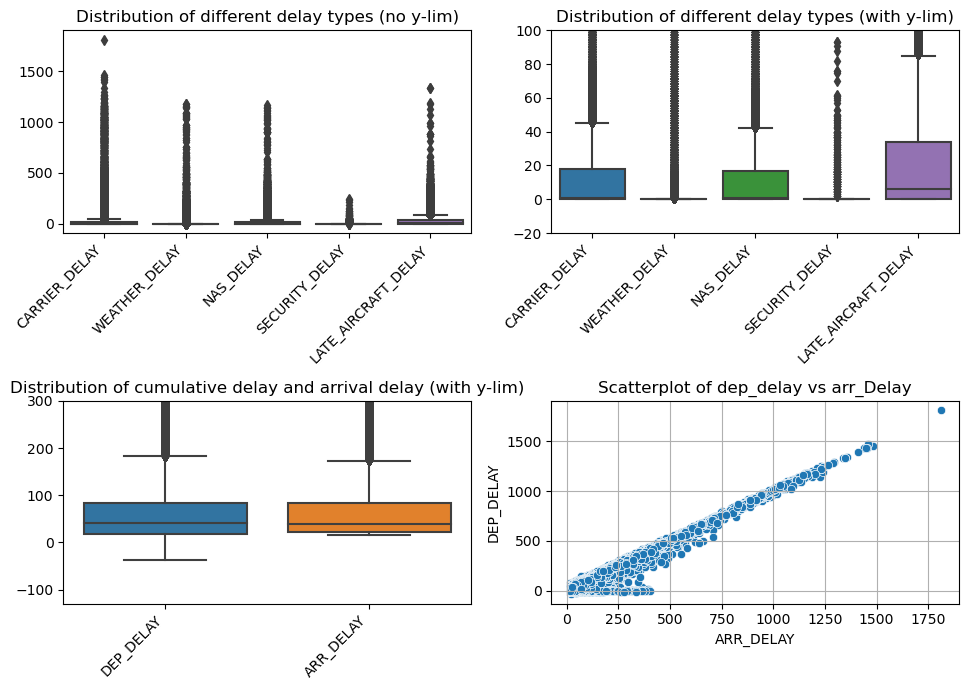

In [83]:
fig, axs = plt.subplots(2,2, figsize = (10,7))
delay_type_df = delay_df[delay_cols].copy()
_cols = list(set(delay_df.columns) - set(delay_cols))
delay_cumulate_df = delay_df[_cols].copy()
#Boxplot with delay types
axs[0][0].set_title("Distribution of different delay types (no y-lim)")
axs[0][0] = sns.boxplot(data = delay_type_df, ax = axs[0][0])
axs[0][0].tick_params(axis='x', rotation=45)
#Zoomed version of above
axs[0][1].set_title("Distribution of different delay types (with y-lim)")
axs[0][1].set_ylim(bottom = -20, top = 100)
axs[0][1] = sns.boxplot(data = delay_type_df, ax = axs[0][1])
axs[0][1].tick_params(axis='x', rotation=45)
#Boxplot with cumulative delay and target variable
axs[1][0].set_title("Distribution of cumulative delay and arrival delay (with y-lim)")
axs[1][0] = sns.boxplot(data = delay_cumulate_df, ax = axs[1][0])
axs[1][0].set_ylim( top = 300)
axs[1][0].tick_params(axis='x', rotation=45)
#Scatterplot with cumulative delay and target variable
axs[1][1].set_title("Scatterplot of dep_delay vs arr_Delay")
axs[1][1] = sns.scatterplot(data = delay_cumulate_df, x = "ARR_DELAY", y = "DEP_DELAY",  ax = axs[1][1])

fig.tight_layout()
plt.setp(axs[0][0].xaxis.get_majorticklabels(), ha='right')
plt.setp(axs[0][1].xaxis.get_majorticklabels(), ha='right')
plt.setp(axs[1][0].xaxis.get_majorticklabels(), ha='right')
plt.grid()

plt.plot()
delay_df.describe()

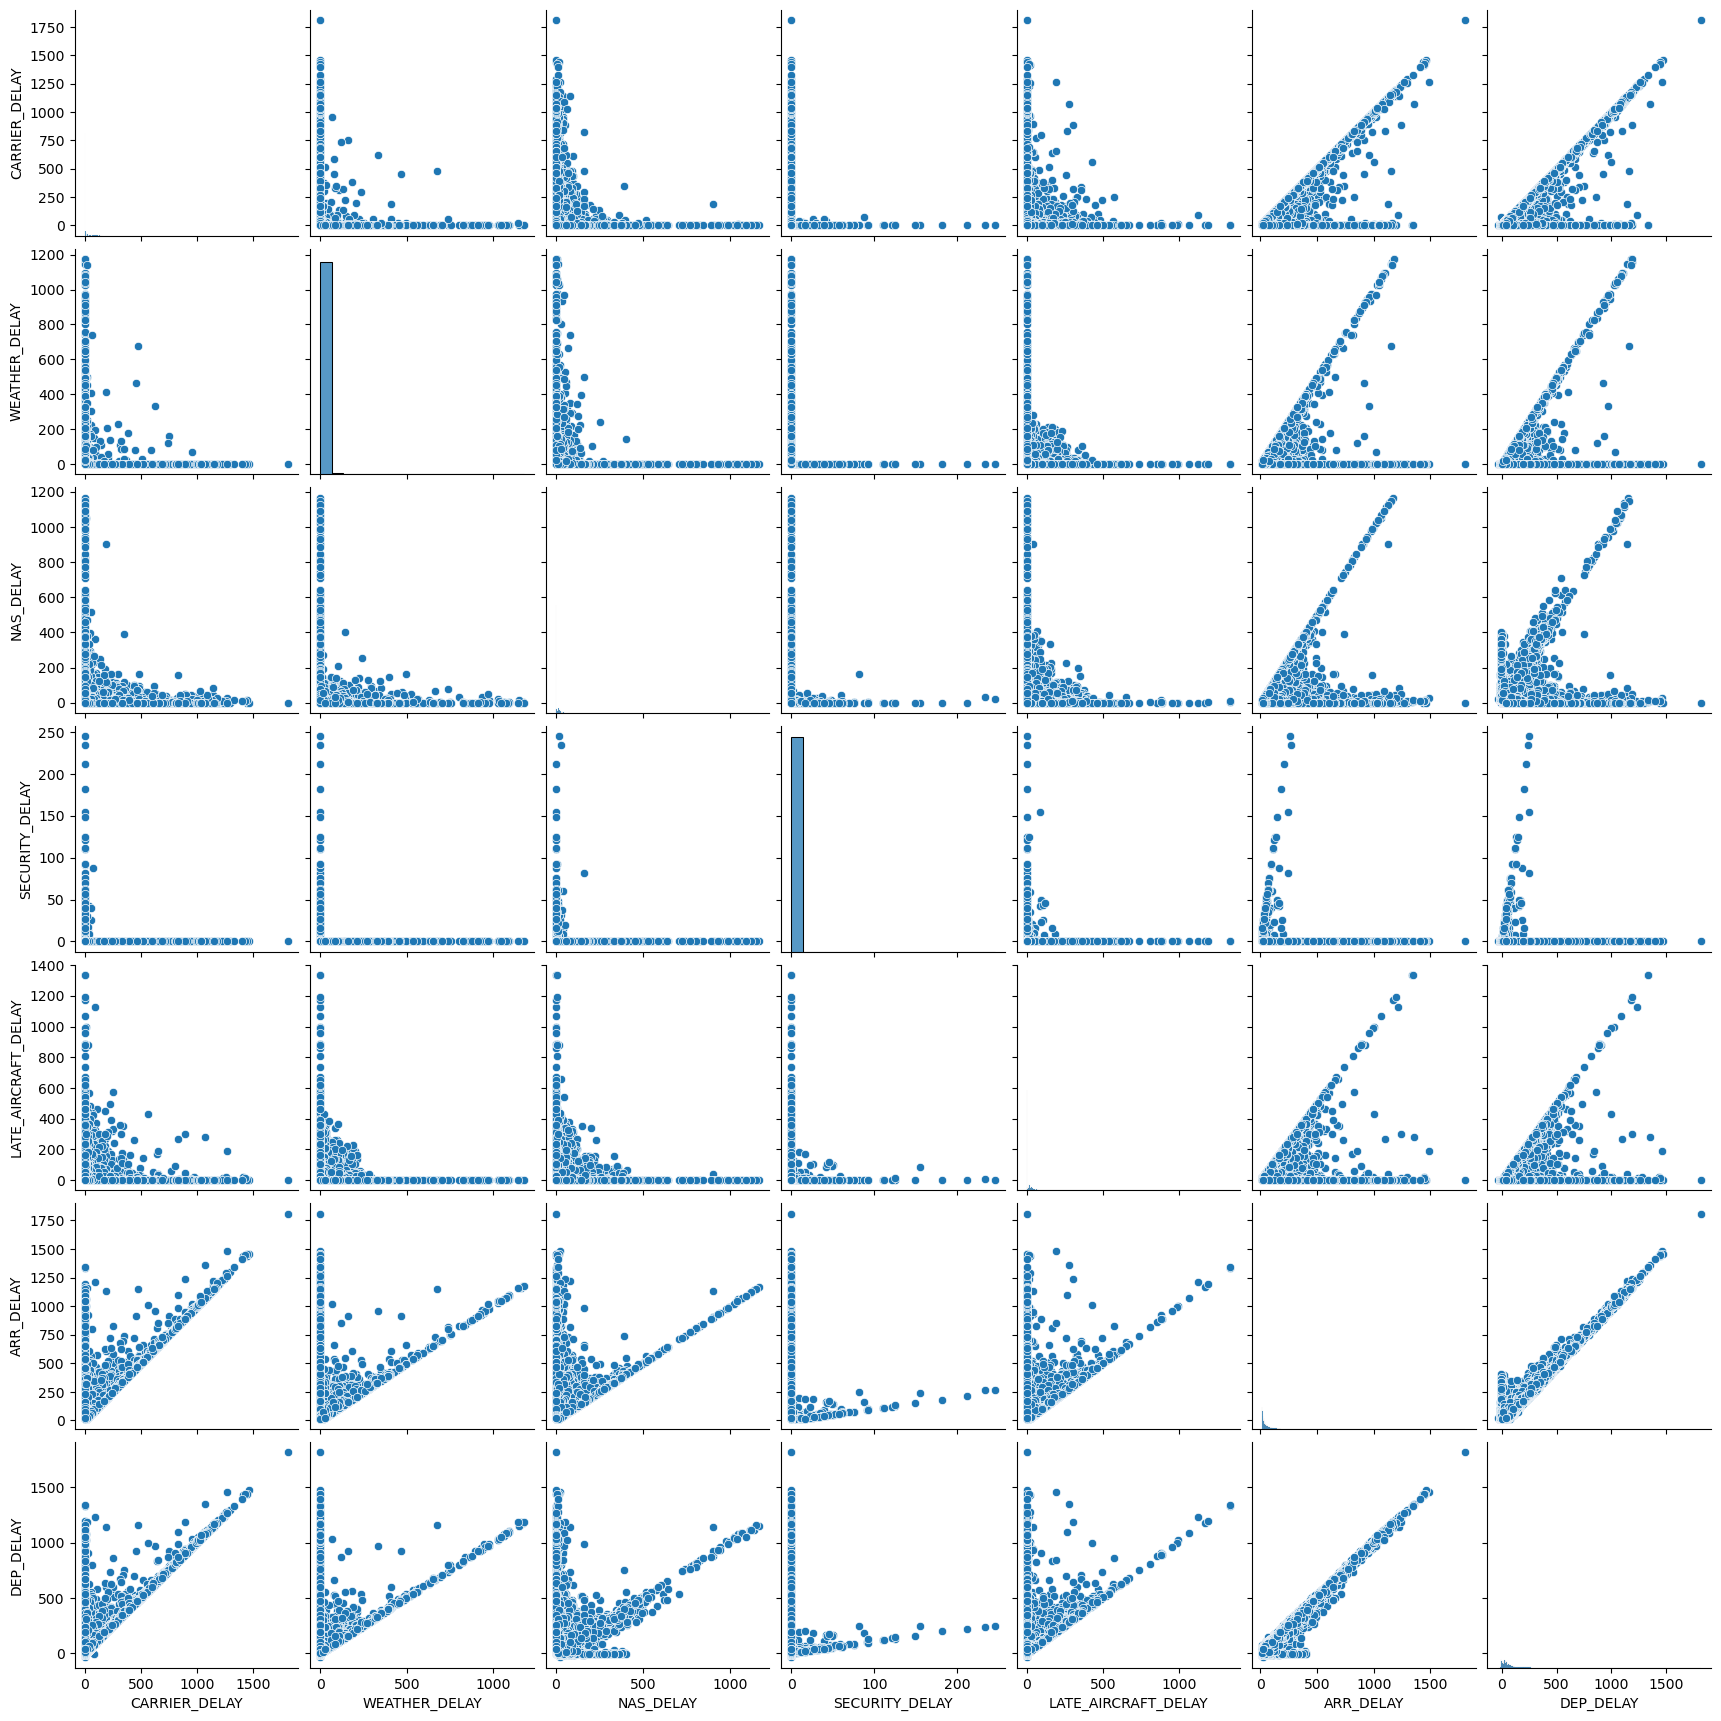

In [84]:
sns.pairplot(data = delay_df)

,ARR_DELAY,CARRIER_DELAY,HAS_CARRIER_DELAY
649,15.0,5.0,True
651,22.0,7.0,True
1290,18.0,10.0,True
3060,23.0,0.0,True
3063,24.0,8.0,True
...,...,...,...
11291864,25.0,0.0,True
11291873,19.0,19.0,True
11291883,15.0,0.0,True
11291909,71.0,0.0,True


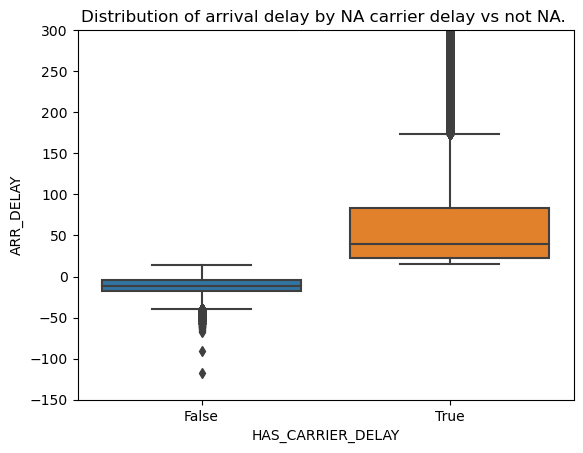

In [85]:
plot_df = atl_flights.copy()
plot_df = plot_df[["ARR_DELAY", "CARRIER_DELAY"]]
plot_df["HAS_CARRIER_DELAY"] = ~plot_df["CARRIER_DELAY"].isna()


fig, ax = plt.subplots(1,1)
ax.set_ylim(bottom=-150, top=300)
ax.set_title("Distribution of arrival delay by NA carrier delay vs not NA. ")
ax = sns.boxplot(data = plot_df, x = "HAS_CARRIER_DELAY", y="ARR_DELAY", ax=ax)

plt.plot()
plot_df[plot_df["HAS_CARRIER_DELAY"] == True]

In [90]:
atl_flights = atl_flights.drop(["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"], axis=1)
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
140,WN,N550WN,3211,AUS,10.0,619.0,853.0,12.0,-1.0,130.0,813.0,2016-01-01 06:10:00,2016-01-01 09:20:00,2016-01-01 06:09:00,2016-01-01 09:05:00,-15.0
141,WN,N739GB,3277,AUS,9.0,1928.0,2202.0,6.0,14.0,120.0,813.0,2016-01-01 19:05:00,2016-01-01 22:05:00,2016-01-01 19:19:00,2016-01-01 22:08:00,3.0
279,WN,N405WN,782,BWI,14.0,1947.0,2119.0,9.0,23.0,125.0,577.0,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 19:33:00,2016-01-01 21:28:00,13.0
280,WN,N638SW,866,BWI,15.0,2039.0,2221.0,10.0,4.0,120.0,577.0,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 20:24:00,2016-01-01 22:31:00,11.0
281,WN,N239WN,1856,BWI,9.0,1240.0,1418.0,6.0,21.0,120.0,577.0,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 12:31:00,2016-01-01 14:24:00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,DL,N774DE,2898,CVG,12.0,1244.0,1357.0,7.0,-5.0,103.0,373.0,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 12:32:00,2017-12-31 14:04:00,-16.0
11292046,DL,N775DE,2901,CVG,10.0,1112.0,1221.0,7.0,-8.0,96.0,373.0,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 11:02:00,2017-12-31 12:28:00,-18.0
11292050,DL,N950AT,2910,AVP,11.0,617.0,820.0,7.0,6.0,153.0,714.0,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 06:06:00,2017-12-31 08:27:00,-6.0
11292052,DL,N391DA,2927,SMF,13.0,2336.0,617.0,6.0,-2.0,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26.0


## Outlier Detection

We can see that the delay columns have some strong outliers. Now we experiment with some outlier reduction methods to see what fits best.

In [91]:
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
140,WN,N550WN,3211,AUS,10.0,619.0,853.0,12.0,-1.0,130.0,813.0,2016-01-01 06:10:00,2016-01-01 09:20:00,2016-01-01 06:09:00,2016-01-01 09:05:00,-15.0
141,WN,N739GB,3277,AUS,9.0,1928.0,2202.0,6.0,14.0,120.0,813.0,2016-01-01 19:05:00,2016-01-01 22:05:00,2016-01-01 19:19:00,2016-01-01 22:08:00,3.0
279,WN,N405WN,782,BWI,14.0,1947.0,2119.0,9.0,23.0,125.0,577.0,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 19:33:00,2016-01-01 21:28:00,13.0
280,WN,N638SW,866,BWI,15.0,2039.0,2221.0,10.0,4.0,120.0,577.0,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 20:24:00,2016-01-01 22:31:00,11.0
281,WN,N239WN,1856,BWI,9.0,1240.0,1418.0,6.0,21.0,120.0,577.0,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 12:31:00,2016-01-01 14:24:00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,DL,N774DE,2898,CVG,12.0,1244.0,1357.0,7.0,-5.0,103.0,373.0,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 12:32:00,2017-12-31 14:04:00,-16.0
11292046,DL,N775DE,2901,CVG,10.0,1112.0,1221.0,7.0,-8.0,96.0,373.0,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 11:02:00,2017-12-31 12:28:00,-18.0
11292050,DL,N950AT,2910,AVP,11.0,617.0,820.0,7.0,6.0,153.0,714.0,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 06:06:00,2017-12-31 08:27:00,-6.0
11292052,DL,N391DA,2927,SMF,13.0,2336.0,617.0,6.0,-2.0,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26.0


In [92]:
delay_df

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY,DEP_DELAY
649,5.0,0.0,0.0,0.0,10.0,15.0,22.0
651,7.0,0.0,0.0,0.0,15.0,22.0,32.0
1290,10.0,0.0,0.0,0.0,8.0,18.0,31.0
3060,0.0,0.0,8.0,0.0,15.0,23.0,15.0
3063,8.0,0.0,16.0,0.0,0.0,24.0,8.0
...,...,...,...,...,...,...,...
11291864,0.0,0.0,25.0,0.0,0.0,25.0,1.0
11291873,19.0,0.0,0.0,0.0,0.0,19.0,38.0
11291883,0.0,0.0,15.0,0.0,0.0,15.0,-1.0
11291909,0.0,15.0,56.0,0.0,0.0,71.0,15.0


Q1: -16.0
Q3: 2.0
IQR: 18.0
LB: -43.0
UB: 29.0
Shape of original df: (739429, 16)
Shape of cleaned df: (675026, 16)


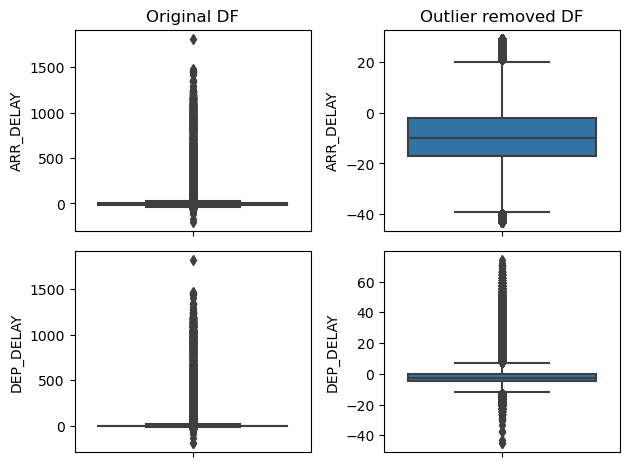

In [93]:
Q1 = atl_flights['ARR_DELAY'].quantile(0.25)
Q3 = atl_flights['ARR_DELAY'].quantile(0.75)
IQR = Q3-Q1
LB = Q1-IQR*1.5
UB = Q3+IQR*1.5

atl_df_clean = atl_flights[(atl_flights["ARR_DELAY"] >= LB) & (atl_flights["ARR_DELAY"] <= UB)]

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0][0].set_title("Original DF")
axs[0][0] = sns.boxplot(data=atl_flights, y = "ARR_DELAY", ax=axs[0][0])
axs[0][1].set_title("Outlier removed DF")
axs[0][1] = sns.boxplot(data=atl_df_clean, y = "ARR_DELAY", ax= axs[0][1])

axs[1][0] = sns.boxplot(data=atl_flights, y = "DEP_DELAY", ax=axs[1][0])
axs[1][1] = sns.boxplot(data=atl_df_clean, y = "DEP_DELAY", ax= axs[1][1])

fig.tight_layout()
plt.plot()

print(f"Q1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLB: {LB}\nUB: {UB}")
print(f"Shape of original df: {atl_flights.shape}")
print(f"Shape of cleaned df: {atl_df_clean.shape}")

In [94]:
atl_flights["ARR_DELAY"]

140        -15.0
141          3.0
279         13.0
280         11.0
281         14.0
            ... 
11292045   -16.0
11292046   -18.0
11292050    -6.0
11292052   -26.0
11292064    11.0
Name: ARR_DELAY, Length: 739429, dtype: float64

In [95]:
def stem(x):
    frac, whole = math.modf(x/10)
    return int(whole), int(round(abs(frac*10)))

def stringify(x):
    return

stem_df = pd.DataFrame([stem(x) for x in atl_flights["ARR_DELAY"].copy()], columns=["stem", "value"])
stem_df["count"] = stem_df["value"]
stem_df = stem_df.groupby(by="stem").agg({'count' : 'count',
                                'value' : lambda x: ''.join(str(e) for e in list(x.sort_values()))})
stem_df

,count,value
stem,,
-20,1,2
-17,1,3
-11,1,7
-9,1,1
-6,13,0000111334567
...,...,...
143,1,9
144,2,18
145,2,58


[]

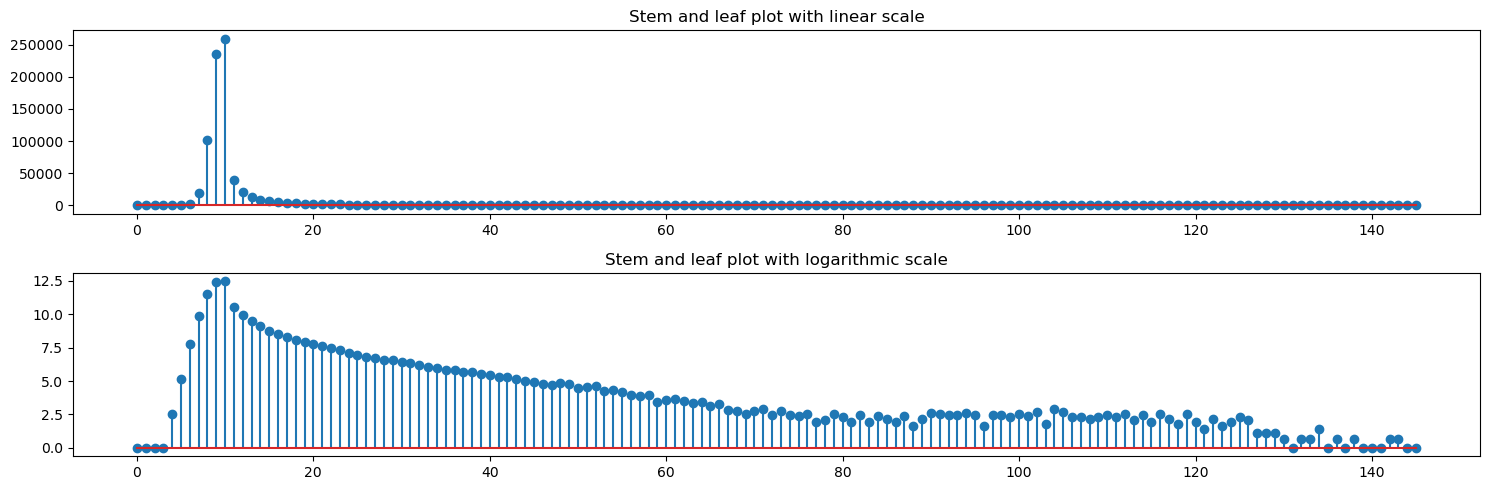

In [98]:
stem_df["count_log"] = [math.log(x) for x in stem_df["count"]]

fig, axs = plt.subplots(2,1,figsize=(15,5))
axs[0].stem(stem_df["count"])
axs[0].set_title("Stem and leaf plot with linear scale")
axs[1].stem(stem_df["count_log"])
axs[1].set_title("Stem and leaf plot with logarithmic scale")

plt.tight_layout()
plt.plot()

In [99]:
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
140,WN,N550WN,3211,AUS,10.0,619.0,853.0,12.0,-1.0,130.0,813.0,2016-01-01 06:10:00,2016-01-01 09:20:00,2016-01-01 06:09:00,2016-01-01 09:05:00,-15.0
141,WN,N739GB,3277,AUS,9.0,1928.0,2202.0,6.0,14.0,120.0,813.0,2016-01-01 19:05:00,2016-01-01 22:05:00,2016-01-01 19:19:00,2016-01-01 22:08:00,3.0
279,WN,N405WN,782,BWI,14.0,1947.0,2119.0,9.0,23.0,125.0,577.0,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 19:33:00,2016-01-01 21:28:00,13.0
280,WN,N638SW,866,BWI,15.0,2039.0,2221.0,10.0,4.0,120.0,577.0,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 20:24:00,2016-01-01 22:31:00,11.0
281,WN,N239WN,1856,BWI,9.0,1240.0,1418.0,6.0,21.0,120.0,577.0,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 12:31:00,2016-01-01 14:24:00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,DL,N774DE,2898,CVG,12.0,1244.0,1357.0,7.0,-5.0,103.0,373.0,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 12:32:00,2017-12-31 14:04:00,-16.0
11292046,DL,N775DE,2901,CVG,10.0,1112.0,1221.0,7.0,-8.0,96.0,373.0,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 11:02:00,2017-12-31 12:28:00,-18.0
11292050,DL,N950AT,2910,AVP,11.0,617.0,820.0,7.0,6.0,153.0,714.0,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 06:06:00,2017-12-31 08:27:00,-6.0
11292052,DL,N391DA,2927,SMF,13.0,2336.0,617.0,6.0,-2.0,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26.0


## Wheels on/off and taxi in/out

In [100]:
atl_flights[["TAXI_IN", "TAXI_OUT", "WHEELS_ON", "WHEELS_OFF"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739429 entries, 140 to 11292064
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   TAXI_IN     739429 non-null  float64
 1   TAXI_OUT    739429 non-null  float64
 2   WHEELS_ON   739429 non-null  float64
 3   WHEELS_OFF  739429 non-null  float64
dtypes: float64(4)
memory usage: 44.3 MB


,TAXI_IN,TAXI_OUT,WHEELS_ON,WHEELS_OFF
count,739429.000000,739429.000000,739429.000000,739429.000000
mean,8.346757,16.136159,1407.145815,1239.956696
std,5.474706,8.712627,484.767440,475.303921
min,1.000000,1.000000,1.000000,1.000000
25%,6.000000,11.000000,953.000000,813.000000
50%,7.000000,14.000000,1415.000000,1226.000000
75%,10.000000,18.000000,1825.000000,1636.000000
max,414.000000,172.000000,2400.000000,2400.000000


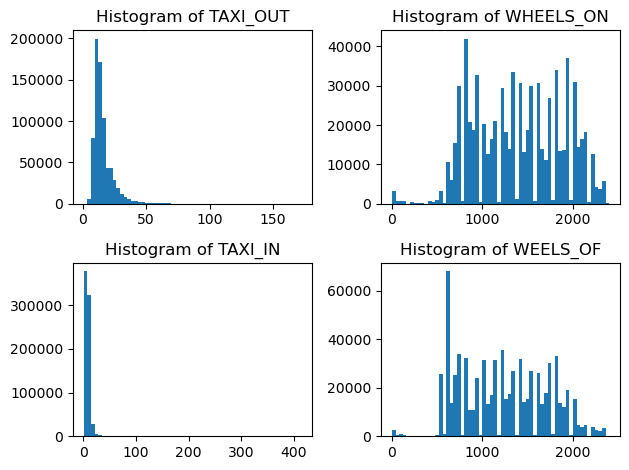

In [101]:
fig, axes = plt.subplots(2,2)
nr_bins = 60

axes[0][0].hist(atl_flights.TAXI_OUT, bins= nr_bins)
axes[0][0].set_title("Histogram of TAXI_OUT")
axes[1][0].hist(atl_flights.TAXI_IN, bins= nr_bins)
axes[1][0].set_title("Histogram of TAXI_IN")
axes[0][1].hist(atl_flights.WHEELS_ON, bins= nr_bins)
axes[0][1].set_title("Histogram of WHEELS_ON")
axes[1][1].hist(atl_flights.WHEELS_OFF, bins= nr_bins)
axes[1][1].set_title("Histogram of WEELS_OF")

plt.tight_layout()
plt.plot()

atl_flights[["TAXI_IN", "TAXI_OUT", "WHEELS_ON", "WHEELS_OFF"]].describe()

In [102]:
atl_flights = atl_flights.drop(["TAXI_IN", "TAXI_OUT", "WHEELS_ON", "WHEELS_OFF"], axis=1)
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
140,WN,N550WN,3211,AUS,-1.0,130.0,813.0,2016-01-01 06:10:00,2016-01-01 09:20:00,2016-01-01 06:09:00,2016-01-01 09:05:00,-15.0
141,WN,N739GB,3277,AUS,14.0,120.0,813.0,2016-01-01 19:05:00,2016-01-01 22:05:00,2016-01-01 19:19:00,2016-01-01 22:08:00,3.0
279,WN,N405WN,782,BWI,23.0,125.0,577.0,2016-01-01 19:10:00,2016-01-01 21:15:00,2016-01-01 19:33:00,2016-01-01 21:28:00,13.0
280,WN,N638SW,866,BWI,4.0,120.0,577.0,2016-01-01 20:20:00,2016-01-01 22:20:00,2016-01-01 20:24:00,2016-01-01 22:31:00,11.0
281,WN,N239WN,1856,BWI,21.0,120.0,577.0,2016-01-01 12:10:00,2016-01-01 14:10:00,2016-01-01 12:31:00,2016-01-01 14:24:00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,DL,N774DE,2898,CVG,-5.0,103.0,373.0,2017-12-31 12:37:00,2017-12-31 14:20:00,2017-12-31 12:32:00,2017-12-31 14:04:00,-16.0
11292046,DL,N775DE,2901,CVG,-8.0,96.0,373.0,2017-12-31 11:10:00,2017-12-31 12:46:00,2017-12-31 11:02:00,2017-12-31 12:28:00,-18.0
11292050,DL,N950AT,2910,AVP,6.0,153.0,714.0,2017-12-31 06:00:00,2017-12-31 08:33:00,2017-12-31 06:06:00,2017-12-31 08:27:00,-6.0
11292052,DL,N391DA,2927,SMF,-2.0,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26.0


In [103]:
atl_flights["DEP_DELAY"] = atl_flights["DEP_DELAY"].astype(int)
atl_flights["ARR_DELAY"] = atl_flights["ARR_DELAY"].astype(int)
atl_flights = atl_flights.sort_values(by="CRS_ARR_DATE")
#atl_flights = atl_flights[~(atl_flights["CRS_ARR_DATE"] < '2017-01-01')]
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
12864,DL,N353NW,766,DEN,-8,170.0,1199.0,2016-01-01 00:15:00,2016-01-01 05:05:00,2016-01-01 00:07:00,2016-01-01 04:33:00,-32
12377,DL,N849DN,2324,SLC,-3,209.0,1590.0,2016-01-01 00:55:00,2016-01-01 06:24:00,2016-01-01 00:52:00,2016-01-01 06:18:00,-6
8481,F9,N201FR,1456,LAS,4,225.0,1747.0,2016-01-01 00:20:00,2016-01-01 07:05:00,2016-01-01 00:24:00,2016-01-01 06:55:00,-10
2658,WN,N8657B,4316,RSW,-5,105.0,515.0,2016-01-01 05:40:00,2016-01-01 07:25:00,2016-01-01 05:35:00,2016-01-01 07:12:00,-13
835,WN,N210WN,350,FLL,-3,115.0,581.0,2016-01-01 05:30:00,2016-01-01 07:25:00,2016-01-01 05:27:00,2016-01-01 07:09:00,-16
...,...,...,...,...,...,...,...,...,...,...,...,...
11292052,DL,N391DA,2927,SMF,-2,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26
11285768,AA,N3CDAA,1116,LAX,-2,257.0,1947.0,2017-12-31 23:47:00,2018-01-01 07:04:00,2017-12-31 23:45:00,2018-01-01 06:38:00,-26
11290999,DL,N804DN,1354,LAX,-1,246.0,1947.0,2017-12-31 23:59:00,2018-01-01 07:05:00,2017-12-31 23:58:00,2018-01-01 07:05:00,0
11290527,DL,N862DN,705,SFO,-4,276.0,2139.0,2017-12-31 23:30:00,2018-01-01 07:06:00,2017-12-31 23:26:00,2018-01-01 06:33:00,-33


In [104]:
atl_flights = atl_flights.drop("OP_CARRIER_FL_NUM", axis=1)
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
12864,DL,N353NW,DEN,-8,170.0,1199.0,2016-01-01 00:15:00,2016-01-01 05:05:00,2016-01-01 00:07:00,2016-01-01 04:33:00,-32
12377,DL,N849DN,SLC,-3,209.0,1590.0,2016-01-01 00:55:00,2016-01-01 06:24:00,2016-01-01 00:52:00,2016-01-01 06:18:00,-6
8481,F9,N201FR,LAS,4,225.0,1747.0,2016-01-01 00:20:00,2016-01-01 07:05:00,2016-01-01 00:24:00,2016-01-01 06:55:00,-10
2658,WN,N8657B,RSW,-5,105.0,515.0,2016-01-01 05:40:00,2016-01-01 07:25:00,2016-01-01 05:35:00,2016-01-01 07:12:00,-13
835,WN,N210WN,FLL,-3,115.0,581.0,2016-01-01 05:30:00,2016-01-01 07:25:00,2016-01-01 05:27:00,2016-01-01 07:09:00,-16
...,...,...,...,...,...,...,...,...,...,...,...
11292052,DL,N391DA,SMF,-2,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26
11285768,AA,N3CDAA,LAX,-2,257.0,1947.0,2017-12-31 23:47:00,2018-01-01 07:04:00,2017-12-31 23:45:00,2018-01-01 06:38:00,-26
11290999,DL,N804DN,LAX,-1,246.0,1947.0,2017-12-31 23:59:00,2018-01-01 07:05:00,2017-12-31 23:58:00,2018-01-01 07:05:00,0
11290527,DL,N862DN,SFO,-4,276.0,2139.0,2017-12-31 23:30:00,2018-01-01 07:06:00,2017-12-31 23:26:00,2018-01-01 06:33:00,-33


In [105]:
time_df = atl_flights.set_index('CRS_ARR_DATE', inplace = False)
time_df["count"] = 1
time_df

,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY,count
CRS_ARR_DATE,,,,,,,,,,,
2016-01-01 05:05:00,DL,N353NW,DEN,-8,170.0,1199.0,2016-01-01 00:15:00,2016-01-01 00:07:00,2016-01-01 04:33:00,-32,1
2016-01-01 06:24:00,DL,N849DN,SLC,-3,209.0,1590.0,2016-01-01 00:55:00,2016-01-01 00:52:00,2016-01-01 06:18:00,-6,1
2016-01-01 07:05:00,F9,N201FR,LAS,4,225.0,1747.0,2016-01-01 00:20:00,2016-01-01 00:24:00,2016-01-01 06:55:00,-10,1
2016-01-01 07:25:00,WN,N8657B,RSW,-5,105.0,515.0,2016-01-01 05:40:00,2016-01-01 05:35:00,2016-01-01 07:12:00,-13,1
2016-01-01 07:25:00,WN,N210WN,FLL,-3,115.0,581.0,2016-01-01 05:30:00,2016-01-01 05:27:00,2016-01-01 07:09:00,-16,1
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 06:49:00,DL,N391DA,SMF,-2,264.0,2092.0,2017-12-31 23:25:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26,1
2018-01-01 07:04:00,AA,N3CDAA,LAX,-2,257.0,1947.0,2017-12-31 23:47:00,2017-12-31 23:45:00,2018-01-01 06:38:00,-26,1
2018-01-01 07:05:00,DL,N804DN,LAX,-1,246.0,1947.0,2017-12-31 23:59:00,2017-12-31 23:58:00,2018-01-01 07:05:00,0,1


In [106]:
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY
12864,DL,N353NW,DEN,-8,170.0,1199.0,2016-01-01 00:15:00,2016-01-01 05:05:00,2016-01-01 00:07:00,2016-01-01 04:33:00,-32
12377,DL,N849DN,SLC,-3,209.0,1590.0,2016-01-01 00:55:00,2016-01-01 06:24:00,2016-01-01 00:52:00,2016-01-01 06:18:00,-6
8481,F9,N201FR,LAS,4,225.0,1747.0,2016-01-01 00:20:00,2016-01-01 07:05:00,2016-01-01 00:24:00,2016-01-01 06:55:00,-10
2658,WN,N8657B,RSW,-5,105.0,515.0,2016-01-01 05:40:00,2016-01-01 07:25:00,2016-01-01 05:35:00,2016-01-01 07:12:00,-13
835,WN,N210WN,FLL,-3,115.0,581.0,2016-01-01 05:30:00,2016-01-01 07:25:00,2016-01-01 05:27:00,2016-01-01 07:09:00,-16
...,...,...,...,...,...,...,...,...,...,...,...
11292052,DL,N391DA,SMF,-2,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26
11285768,AA,N3CDAA,LAX,-2,257.0,1947.0,2017-12-31 23:47:00,2018-01-01 07:04:00,2017-12-31 23:45:00,2018-01-01 06:38:00,-26
11290999,DL,N804DN,LAX,-1,246.0,1947.0,2017-12-31 23:59:00,2018-01-01 07:05:00,2017-12-31 23:58:00,2018-01-01 07:05:00,0
11290527,DL,N862DN,SFO,-4,276.0,2139.0,2017-12-31 23:30:00,2018-01-01 07:06:00,2017-12-31 23:26:00,2018-01-01 06:33:00,-33


In [107]:
crs_time_secs = atl_flights["CRS_ARR_DATE"].apply(lambda x: int(x.timestamp())).to_numpy()
crs_time_secs

array([1451624700, 1451629440, 1451631900, ..., 1514790300, 1514790360,
       1514792100], dtype=int64)

In [108]:
arr = []
for i in range(len(crs_time_secs)):
    if i%10000 == 0:
        print(i)
    x = crs_time_secs[i]
    lb = x-3600
    arr.append(len(np.where(np.logical_and(crs_time_secs < x, crs_time_secs >= lb))[0]))
arr

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000


[0,
 0,
 1,
 1,
 1,
 3,
 4,
 5,
 6,
 7,
 7,
 7,
 7,
 10,
 11,
 12,
 12,
 14,
 15,
 16,
 15,
 16,
 16,
 18,
 18,
 19,
 19,
 19,
 22,
 22,
 24,
 24,
 24,
 24,
 24,
 29,
 30,
 30,
 31,
 32,
 32,
 32,
 35,
 35,
 35,
 38,
 38,
 40,
 40,
 42,
 42,
 44,
 44,
 45,
 46,
 46,
 46,
 46,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 57,
 57,
 57,
 57,
 57,
 57,
 63,
 63,
 63,
 65,
 65,
 65,
 68,
 68,
 68,
 71,
 71,
 72,
 72,
 74,
 74,
 76,
 76,
 78,
 78,
 78,
 78,
 78,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 95,
 96,
 96,
 96,
 96,
 96,
 96,
 99,
 99,
 100,
 100,
 100,
 99,
 99,
 98,
 95,
 93,
 84,
 85,
 85,
 80,
 77,
 76,
 48,
 36,
 25,
 26,
 26,
 21,
 21,
 22,
 17,
 17,
 18,
 18,
 18,
 18,
 20,
 21,
 20,
 20,
 20,
 20,
 20,
 21,
 22,
 22,
 24,
 25,
 26,
 27,
 27,
 28,
 26,
 27,
 28,
 28,
 28,
 28,
 30,
 29,
 29,
 31,
 32,
 32,
 32,
 35,
 36,
 37,
 38,
 38,
 39,
 39,
 39,
 42,
 42,
 43,
 44,
 43,
 43,
 41,
 42,
 43,
 43,
 41,
 40,
 40,
 40,
 38,
 38,
 39,
 39,
 40,
 40,
 39,
 36,
 36,


In [109]:
atl_flights["PREV_FLIGHTS_1H"] = arr
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,ARR_DELAY,PREV_FLIGHTS_1H
12864,DL,N353NW,DEN,-8,170.0,1199.0,2016-01-01 00:15:00,2016-01-01 05:05:00,2016-01-01 00:07:00,2016-01-01 04:33:00,-32,0
12377,DL,N849DN,SLC,-3,209.0,1590.0,2016-01-01 00:55:00,2016-01-01 06:24:00,2016-01-01 00:52:00,2016-01-01 06:18:00,-6,0
8481,F9,N201FR,LAS,4,225.0,1747.0,2016-01-01 00:20:00,2016-01-01 07:05:00,2016-01-01 00:24:00,2016-01-01 06:55:00,-10,1
2658,WN,N8657B,RSW,-5,105.0,515.0,2016-01-01 05:40:00,2016-01-01 07:25:00,2016-01-01 05:35:00,2016-01-01 07:12:00,-13,1
835,WN,N210WN,FLL,-3,115.0,581.0,2016-01-01 05:30:00,2016-01-01 07:25:00,2016-01-01 05:27:00,2016-01-01 07:09:00,-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11292052,DL,N391DA,SMF,-2,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,-26,2
11285768,AA,N3CDAA,LAX,-2,257.0,1947.0,2017-12-31 23:47:00,2018-01-01 07:04:00,2017-12-31 23:45:00,2018-01-01 06:38:00,-26,2
11290999,DL,N804DN,LAX,-1,246.0,1947.0,2017-12-31 23:59:00,2018-01-01 07:05:00,2017-12-31 23:58:00,2018-01-01 07:05:00,0,3
11290527,DL,N862DN,SFO,-4,276.0,2139.0,2017-12-31 23:30:00,2018-01-01 07:06:00,2017-12-31 23:26:00,2018-01-01 06:33:00,-33,4


In [119]:
cols = atl_flights.columns
cols = list(cols)
cols = cols[:-2] + [cols[-1]] + [cols[-2]]
atl_flights = atl_flights[cols]
atl_flights

,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,PREV_FLIGHTS_1H,ARR_DELAY
12864,DL,N353NW,DEN,-8,170.0,1199.0,2016-01-01 00:15:00,2016-01-01 05:05:00,2016-01-01 00:07:00,2016-01-01 04:33:00,0,-32
12377,DL,N849DN,SLC,-3,209.0,1590.0,2016-01-01 00:55:00,2016-01-01 06:24:00,2016-01-01 00:52:00,2016-01-01 06:18:00,0,-6
8481,F9,N201FR,LAS,4,225.0,1747.0,2016-01-01 00:20:00,2016-01-01 07:05:00,2016-01-01 00:24:00,2016-01-01 06:55:00,1,-10
2658,WN,N8657B,RSW,-5,105.0,515.0,2016-01-01 05:40:00,2016-01-01 07:25:00,2016-01-01 05:35:00,2016-01-01 07:12:00,1,-13
835,WN,N210WN,FLL,-3,115.0,581.0,2016-01-01 05:30:00,2016-01-01 07:25:00,2016-01-01 05:27:00,2016-01-01 07:09:00,1,-16
...,...,...,...,...,...,...,...,...,...,...,...,...
11292052,DL,N391DA,SMF,-2,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,2,-26
11285768,AA,N3CDAA,LAX,-2,257.0,1947.0,2017-12-31 23:47:00,2018-01-01 07:04:00,2017-12-31 23:45:00,2018-01-01 06:38:00,2,-26
11290999,DL,N804DN,LAX,-1,246.0,1947.0,2017-12-31 23:59:00,2018-01-01 07:05:00,2017-12-31 23:58:00,2018-01-01 07:05:00,3,0
11290527,DL,N862DN,SFO,-4,276.0,2139.0,2017-12-31 23:30:00,2018-01-01 07:06:00,2017-12-31 23:26:00,2018-01-01 06:33:00,4,-33


In [120]:
atl_flights.to_pickle("./prepped_files/01_flights.pkl")